# 구글 드라이브 마운트 및 path 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/경희대학원 데이터마이닝 중간과제/'

# 모듈 불러오기

In [3]:
!pip install phik

     |████████████████████████████████| 1.1MB 2.8MB/s 
     |████████████████████████████████| 27.4MB 144kB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=a93fc3a2f8e17eac27b7b31cecf0c11c6fb6d09711a036cfa847a8d3965e4137
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built phik
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [4]:
!pip install catboost

     |████████████████████████████████| 67.3MB 55kB/s 


In [5]:
# import 'os'
import os

# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 

# import phi corr
import phik

# import various functions from sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from IPython.display import Image 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier

In [6]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

# 주제

In [7]:
'''
Improve bank marketing of a bank by analyzing their past marketing campaign data and recommending which customer to target.
The aim of this project is to devise such a machine leaning prediction algorithm, the bank can better target its customers 
and channelize its marketing efforts.
'''

'\nImprove bank marketing of a bank by analyzing their past marketing campaign data and recommending which customer to target.\nThe aim of this project is to devise such a machine leaning prediction algorithm, the bank can better target its customers \nand channelize its marketing efforts.\n'

# 목표

In [8]:
'''
The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).
'''

'\nThe classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).\n'

# 데이터 변수 설명

In [9]:
'''
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - balance: balance od the customer

17 - y - has the client subscribed a term deposit? (binary: 'yes','no')
'''


"\n1 - age (numeric)\n\n2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')\n\n3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)\n\n4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')\n\n5 - default: has credit in default? (categorical: 'no','yes','unknown')\n\n6 - housing: has housing loan? (categorical: 'no','yes','unknown')\n\n7 - loan: has personal loan? (categorical: 'no','yes','unknown')\n\n8 - contact: contact communication type (categorical: 'cellular','telephone')\n\n9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')\n\n10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')\n\n11 - duration: last contact dur

# 데이터 불러오기

In [10]:
df=pd.read_csv(os.path.join(path, 'bank.csv'))

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# 데이터 준비

In [12]:
df.shape

(11162, 17)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# 카테고리컬 데이터 확인

In [15]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


# 결측값 확인

In [16]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

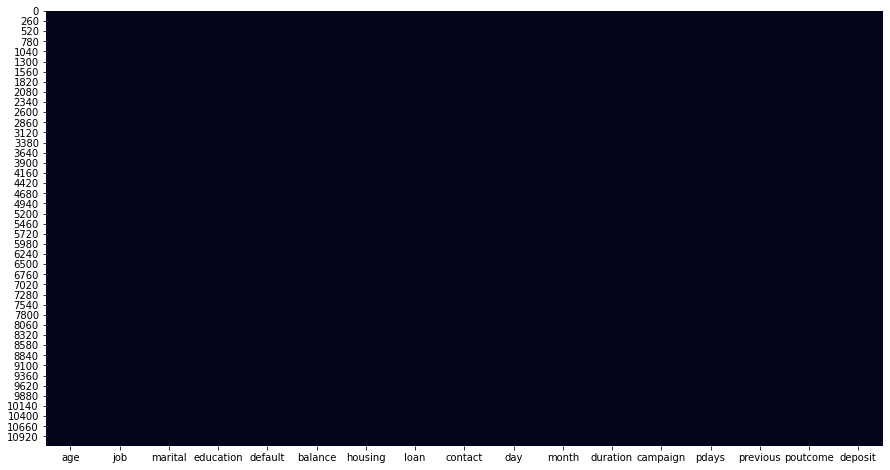

In [17]:
plt.figure(figsize=(15, 8))

sns.heatmap(df.isnull(), cbar=False)

plt.show()

# int형 변수 상세분석

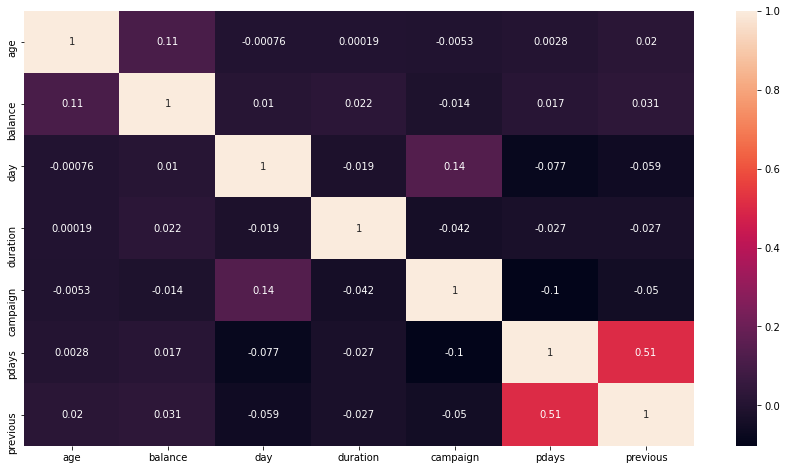

In [18]:
cor=df.corr()
plt.figure(figsize=(15, 8))

sns.heatmap(cor,annot=True)

plt.show()

In [19]:
'''
숫자형태의 자료끼리 관계 따짐
Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, 
and mild correlations between “balance”, “month of contact” and “number of campaign”. 
Their influences on campaign outcome will be investigated further in the machine learning part.
'''

'\n숫자형태의 자료끼리 관계 따짐\nClearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, \nand mild correlations between “balance”, “month of contact” and “number of campaign”. \nTheir influences on campaign outcome will be investigated further in the machine learning part.\n'

# 카테고리 데이터 상세 분석

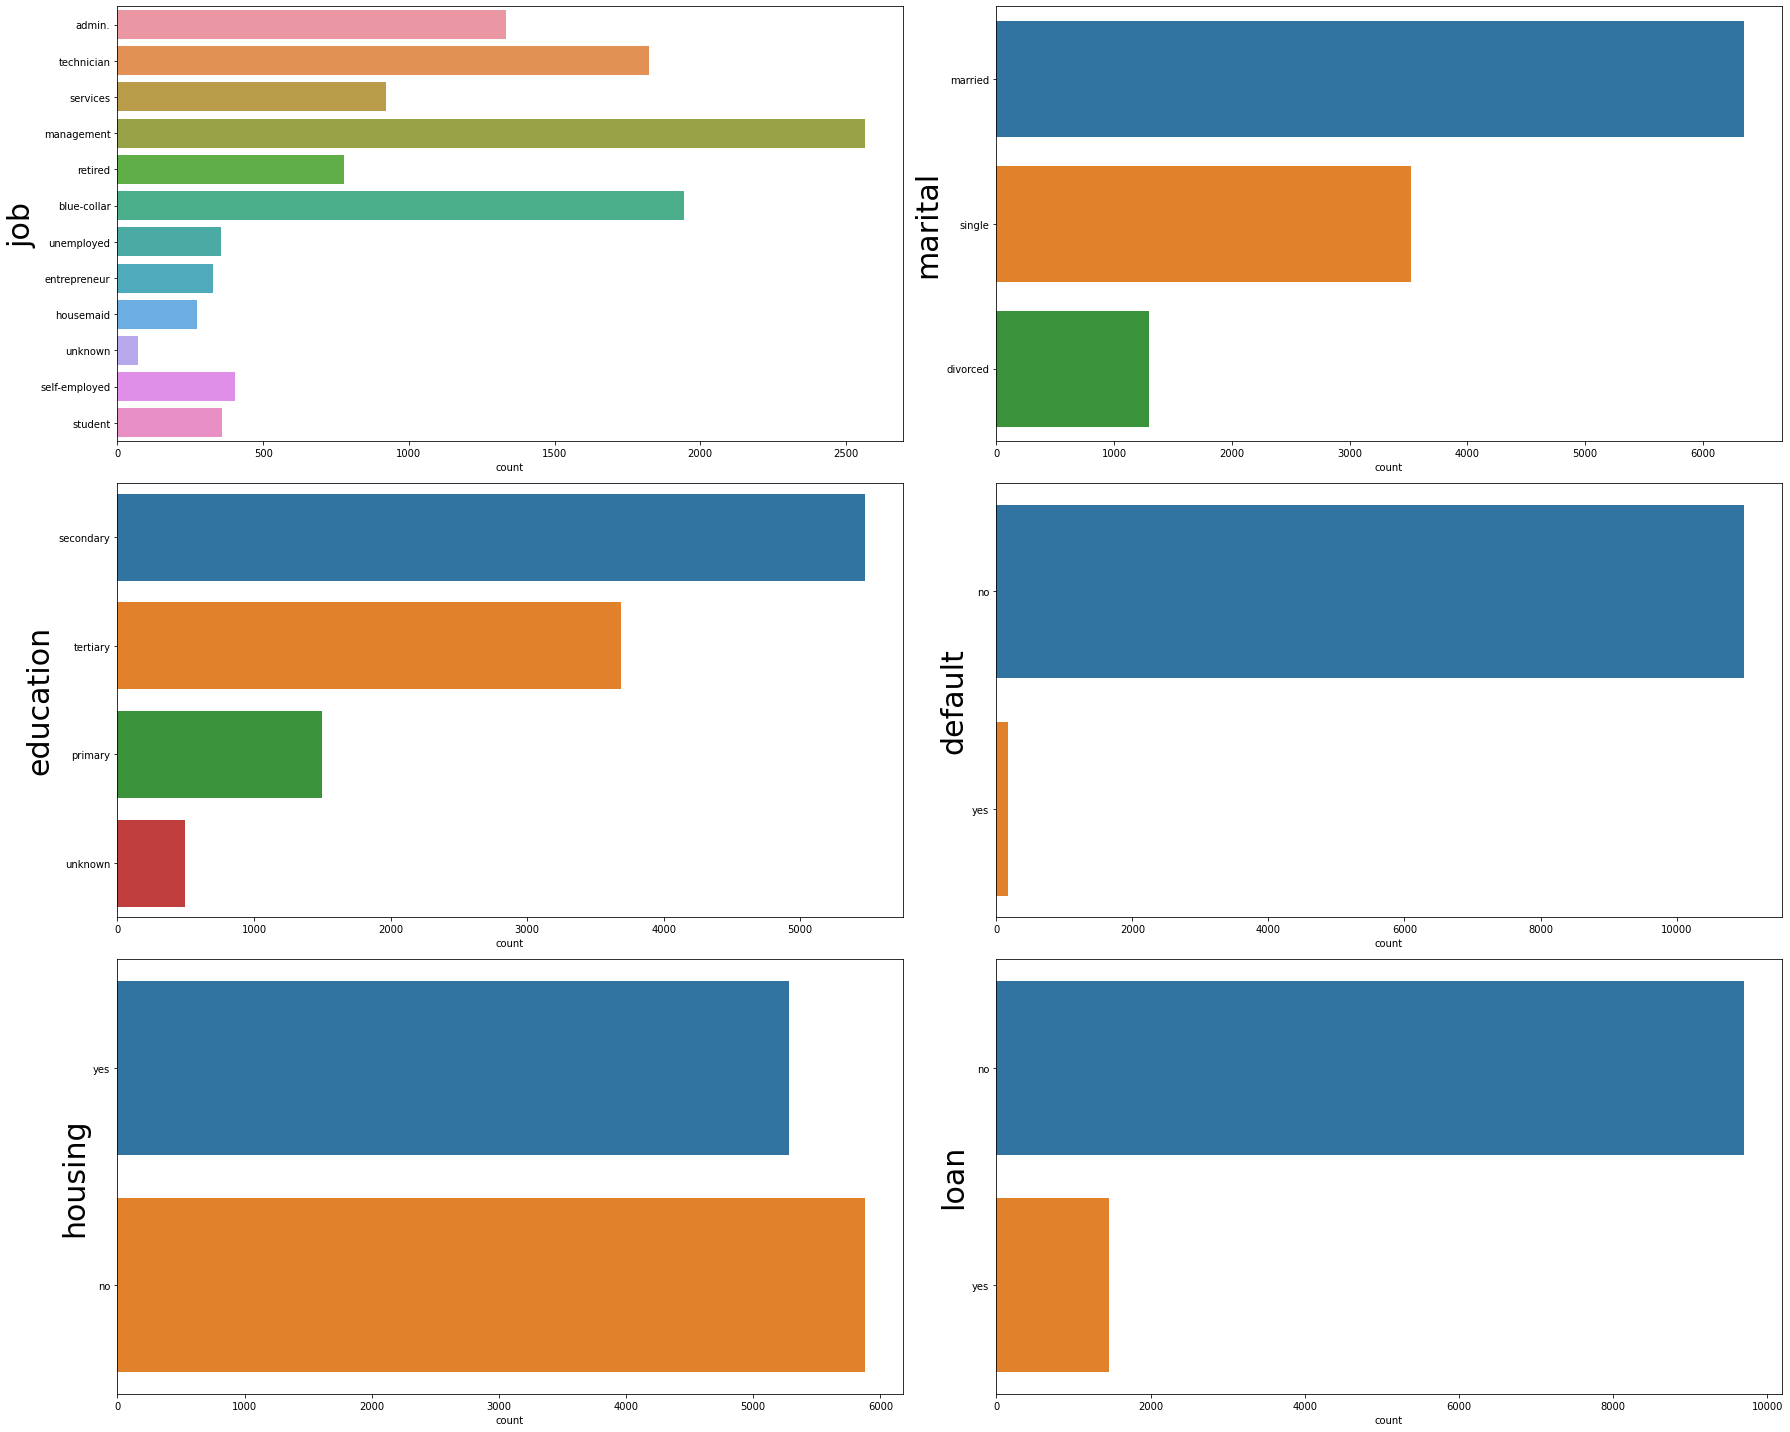

In [20]:
df_categoric_features = df.select_dtypes(include='object').drop(['deposit'], axis=1)
fig, ax = plt.subplots(3, 2, figsize=(25, 20))
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    countplot = sns.countplot(y=df[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30) 
plt.tight_layout()   
plt.show()

In [21]:
cor_cate = df_categoric_features.phik_matrix()

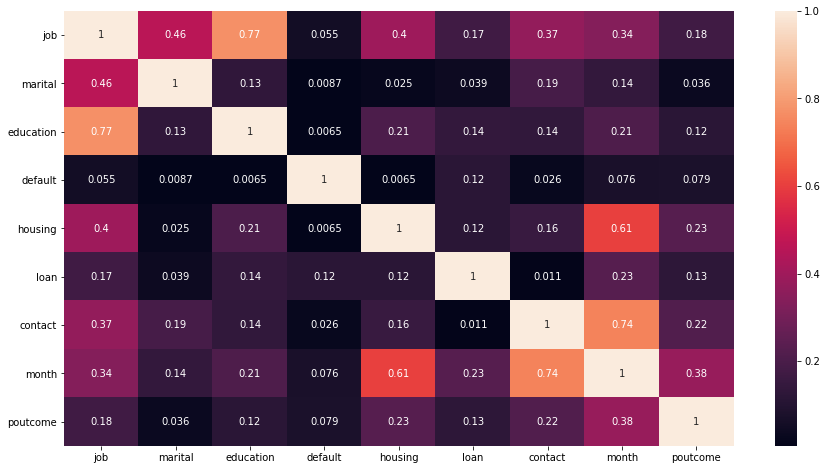

In [22]:
plt.figure(figsize=(15, 8))

sns.heatmap(cor_cate,annot=True)

plt.show()

In [23]:
df.select_dtypes(include='object').head()
# 반대 df.select_dtypes(exclude='object').head()

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
0,admin.,married,secondary,no,yes,no,unknown,may,unknown,yes
1,admin.,married,secondary,no,no,no,unknown,may,unknown,yes
2,technician,married,secondary,no,yes,no,unknown,may,unknown,yes
3,services,married,secondary,no,yes,no,unknown,may,unknown,yes
4,admin.,married,tertiary,no,no,no,unknown,may,unknown,yes


In [24]:
for i in df_categoric_features:
  print(i)

job
marital
education
default
housing
loan
contact
month
poutcome


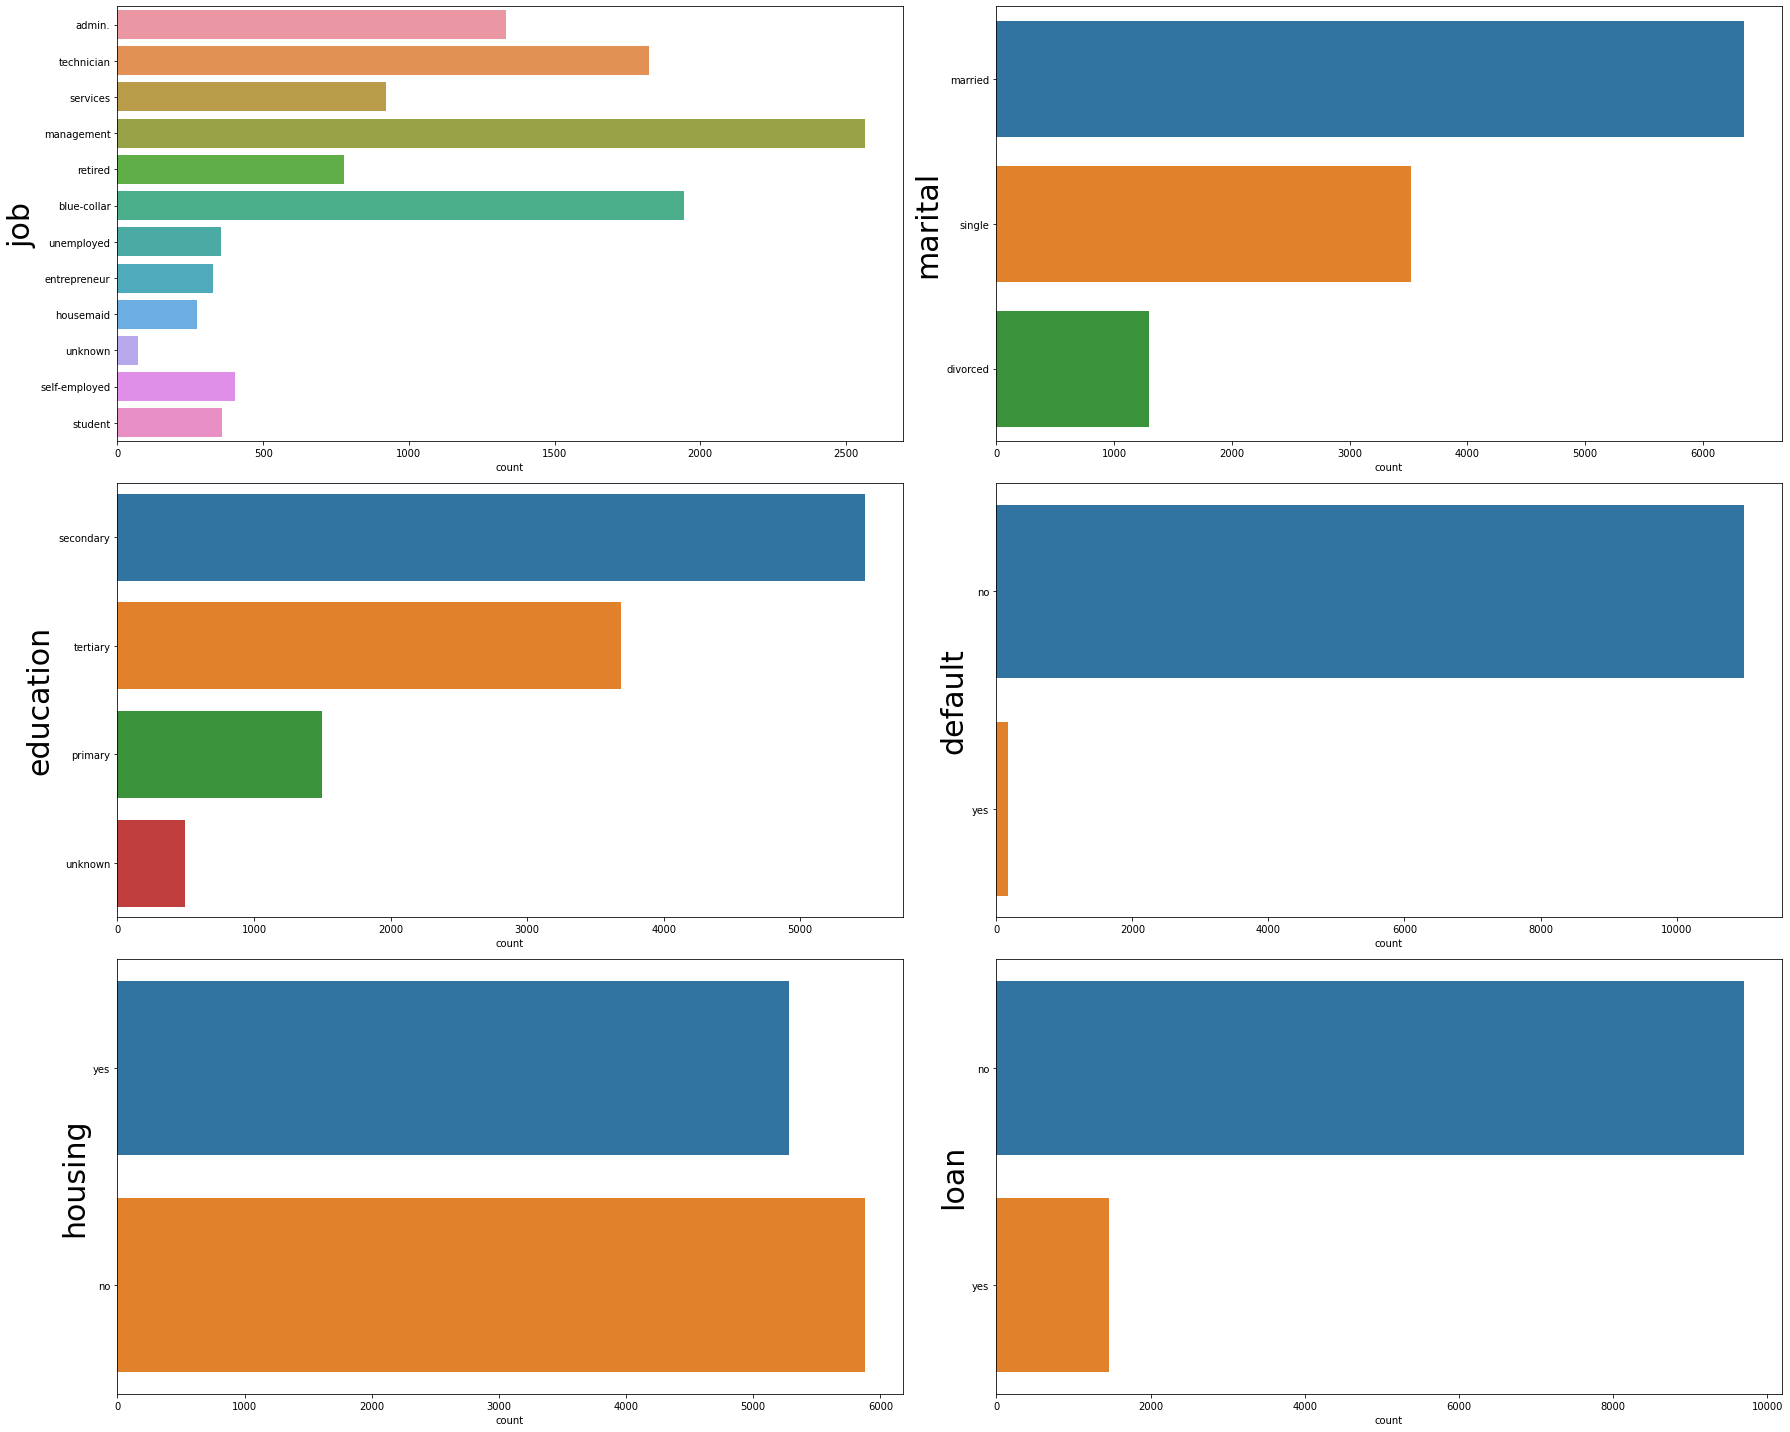

In [25]:
df_categoric_features = df.select_dtypes(include='object').drop(['deposit'], axis=1)
fig, ax = plt.subplots(3, 2, figsize=(25, 20))
for variable, subplot in zip(df_categoric_features, ax.flatten()): #flatten -> 다차원 배열을 일차원으로
    countplot = sns.countplot(y=df[variable], ax=subplot )
    countplot.set_ylabel(variable, fontsize = 30) 
plt.tight_layout() #여백에 관한 파라미터 자동 조정
plt.show()

In [26]:
for i in df_categoric_features:
    print('###########')
    print(i.upper())
    print(df[i].value_counts())

###########
JOB
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
###########
MARITAL
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
###########
EDUCATION
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
###########
DEFAULT
no     10994
yes      168
Name: default, dtype: int64
###########
HOUSING
no     5881
yes    5281
Name: housing, dtype: int64
###########
LOAN
no     9702
yes    1460
Name: loan, dtype: int64
###########
CONTACT
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64
###########
MONTH
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     1

 # 수치형 데이터 EDA

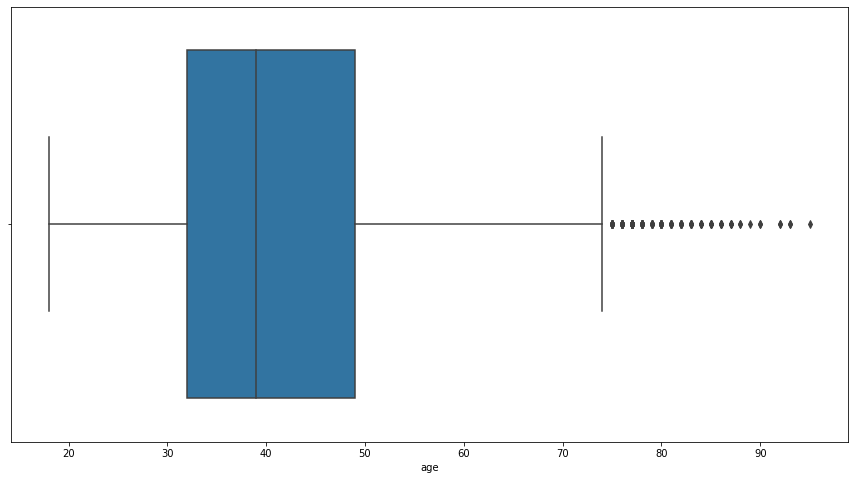

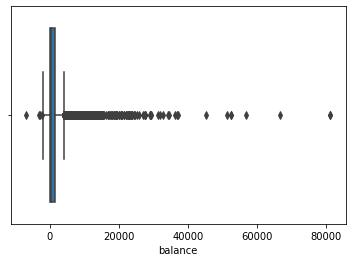

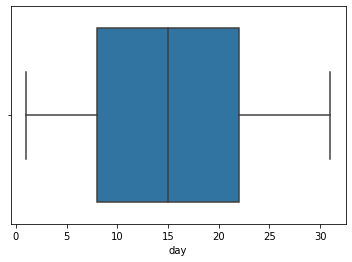

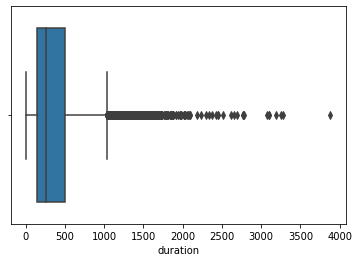

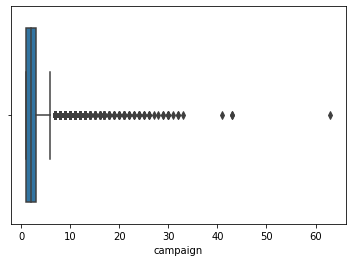

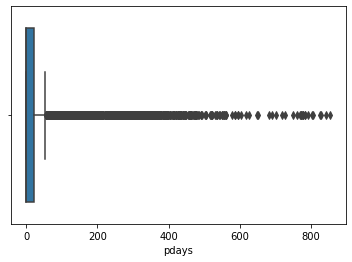

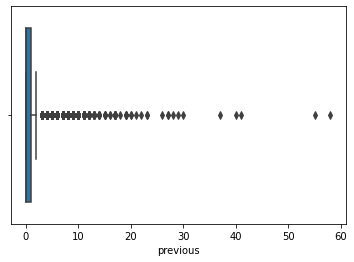

In [27]:
df_num=df.select_dtypes(include=np.number)
plt.figure(figsize=(15, 8))
for i in df_num:
    sns.boxplot(df[i])
    plt.show()

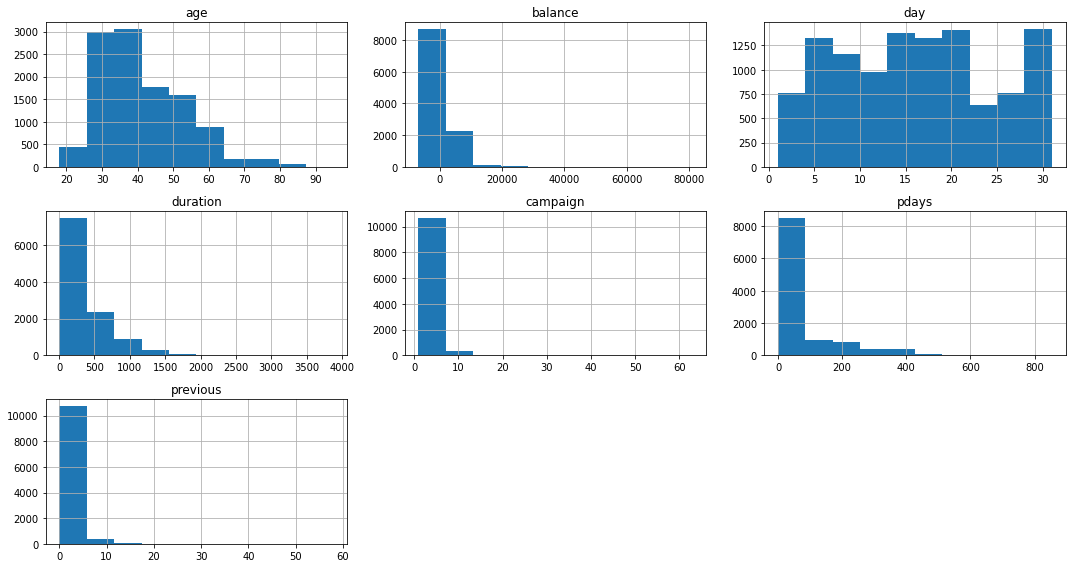

Skewness:


age        0.862780
balance    8.224619
day        0.111330
duration   2.143695
campaign   5.545578
pdays      2.449986
previous   7.335298
dtype: float64

In [28]:
plt.rcParams['figure.figsize'] = [15,8] #디폴트 사이즈 설정할때 rcParams
df.drop('deposit', axis = 1).hist()
plt.tight_layout()
plt.show()  
print('Skewness:') #왜도. 정규분포는 왜도가 0
df.drop('deposit', axis = 1).skew()

# 수치형 데이터 스캐일링

In [29]:
df_num=df.select_dtypes(include=np.number)
X_scaler = StandardScaler()
num_scaled = X_scaler.fit_transform(df_num)
X = pd.DataFrame(num_scaled, columns = df_num.columns)
X.head()

,age,balance,day,duration,campaign,pdays,previous
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.363260
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.363260
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.363260
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.363260
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.363260


In [30]:
X.shape

(11162, 7)

In [31]:
X.skew()

age        0.862780
balance    8.224619
day        0.111330
duration   2.143695
campaign   5.545578
pdays      2.449986
previous   7.335298
dtype: float64

# 카테코리 데이터 인코딩

In [32]:
df_cat=df.select_dtypes(exclude=np.number).drop('deposit',axis=1)
X_encode=pd.get_dummies(df_cat,columns=df_cat.columns)
X_encode.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [33]:
X_encode.shape

(11162, 44)

# 스캐일링 및 인코딩 된 데이터 합치기



In [34]:
x=pd.concat([X,X_encode],axis=1)

In [35]:
x.shape

(11162, 51)

In [36]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.363260,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.363260,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.363260,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.363260,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.363260,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [37]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  11162 non-null  float64
 1   balance              11162 non-null  float64
 2   day                  11162 non-null  float64
 3   duration             11162 non-null  float64
 4   campaign             11162 non-null  float64
 5   pdays                11162 non-null  float64
 6   previous             11162 non-null  float64
 7   job_admin.           11162 non-null  uint8  
 8   job_blue-collar      11162 non-null  uint8  
 9   job_entrepreneur     11162 non-null  uint8  
 10  job_housemaid        11162 non-null  uint8  
 11  job_management       11162 non-null  uint8  
 12  job_retired          11162 non-null  uint8  
 13  job_self-employed    11162 non-null  uint8  
 14  job_services         11162 non-null  uint8  
 15  job_student          11162 non-null 

# 타겟 변수 살펴보기 (데이터 평평한편)

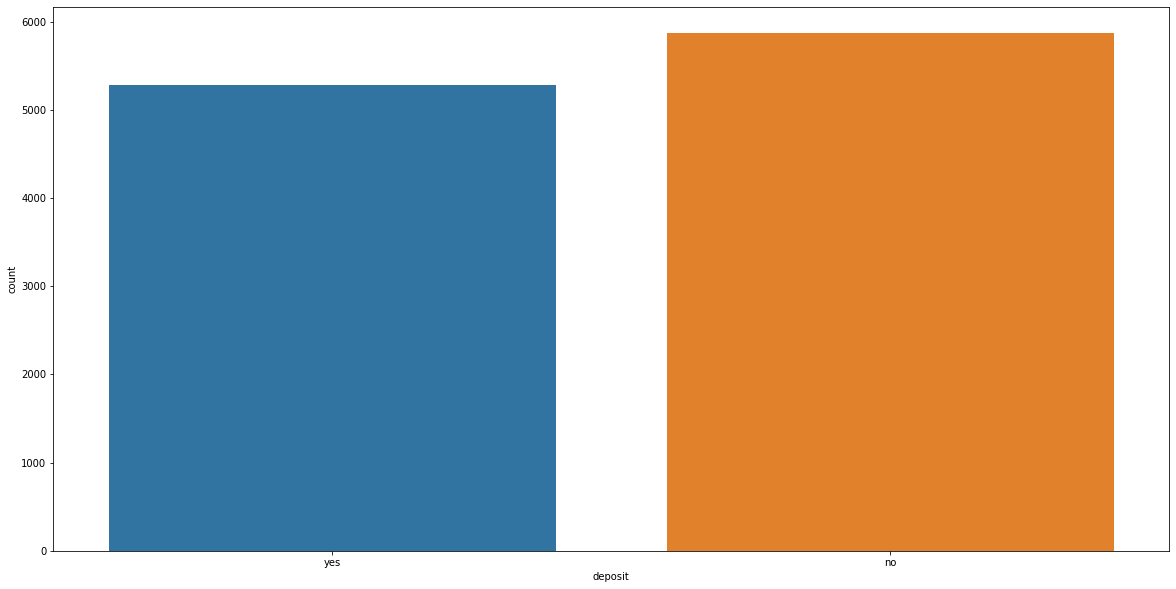

In [38]:
plt.figure(figsize=(20,10))
sns.countplot(df.deposit)
plt.show()

In [39]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [40]:
y=df['deposit']
for i in range(len(y)):
    if y[i] == 'yes':
        y[i] = 1
    else:
        y[i] = 0 
y=y.astype('int')
y.value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

# x와 y 합치기 

In [41]:
total=pd.concat([x,y],axis=1)

# 데이터 분할

In [42]:
# 훈련, 테스트 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =   0.3, random_state = 10) 

In [43]:
y_train.head()

2523     1
7183     0
3692     1
10784    0
7868     0
Name: deposit, dtype: int64

In [44]:
# 검증 데이터 셋 나누기
X_train1, X_val, y_train1, y_val = train_test_split(X_train,y_train, test_size=0.2, random_state=777)

# 필요한 메소드 정의

In [ ]:
score_card = pd.DataFrame(columns=["Model Name",'Prob.Cutoff',"Stability","r2_score", 'AUC', 'Precision', 'Recall',
                                       'Accuracy', 'Kappa', 'f1-score'])
def update_score_card(Model_name,model,cutoff='-',stability="Stable"):
    y_pred_prob = model.predict(X_test)
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":model.prsquared,
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision': metrics.precision_score(y_test, y_pred),
                                    'Recall': metrics.recall_score(y_test, y_pred),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return score_card

In [ ]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [ ]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve for Bank marketing Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

In [ ]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

# 로지스틱 회귀 모델

In [ ]:
def logisticRegression(x,y,lr):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =   0.3, random_state = 10) 
    
    # describes info about train and test set 
    print("Number transactions X_train dataset: ", X_train.shape) 
    print("Number transactions y_train dataset: ", y_train.shape) 
    print("Number transactions X_test dataset: ", X_test.shape) 
    print("Number transactions y_test dataset: ", y_test.shape) 
    
    # train the model on train set 
    lr.fit(X_train, y_train) 
    
    predictions = lr.predict(X_test) 

    # print classification report 
    print(classification_report(y_test, predictions)) 

    cm = confusion_matrix(y_test, predictions, labels=lr.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
    disp.plot() 

In [ ]:
import statsmodels.api as sm
logreg = sm.Logit(y_train, X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.415951
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                deposit   No. Observations:                 7813
Model:                          Logit   Df Residuals:                     7770
Method:                           MLE   Df Model:                           42
Date:                Mon, 03 May 2021   Pseudo R-squ.:                  0.3983
Time:                        06:38:23   Log-Likelihood:                -3249.8
converged:                       True   LL-Null:                       -5401.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
age                    -0.0244      0.045     -0.539      0.590      -0.113       0.064
b

In [ ]:
print('AIC: ',logreg.aic) # AIC는 주어진 데이터 셋에 대한 통계 모델의 상대적인 품질을 평가하는 것이다. 낮을수록 좋다
                          # AIC는 최소의 정보 손실을 갖는 모델이 가장 데이터와 적합한 모델로 선택되는 방법

AIC:  6585.648390330077


In [ ]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) #직관적으로 보기 위해 제곱 적용
df_odds #odds는 성공과 실패의 비율

,Odds
age,0.975864
balance,1.087683
day,1.022499
duration,6.215944
campaign,0.762001
pdays,1.001252
previous,1.031353
job_admin.,1.253628
job_blue-collar,0.858040
job_entrepreneur,0.923967


In [ ]:
y_pred_prob = logreg.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.900433,0.209007,0.365173,0.691426
1,0.898578,0.207275,0.367030,0.691303
2,0.896722,0.205543,0.371730,0.691180
3,0.904762,0.213626,0.357646,0.691136
4,0.894867,0.203811,0.376365,0.691056


In [ ]:
y_pred_prob = logreg.predict(X_test)
y_pred_prob.head()

10794   0.810691
988     0.550494
8515    0.353902
10223   0.415580
10052   0.272646
dtype: float64

In [ ]:
y_pred_prob = logreg.predict(X_test)
y_pred = [ 0 if x < 0.69 else 1 for x in y_pred_prob]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81      1732
           1       0.88      0.64      0.74      1617

    accuracy                           0.78      3349
   macro avg       0.81      0.78      0.78      3349
weighted avg       0.80      0.78      0.78      3349



In [ ]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
precision = TP / (TP+FP)
print('Precision:',precision)
recall = TP / (TP+FN)
print('Recall:',recall)
specificity = TN / (TN+FP)
print('Specificity:',specificity)
f1_score = 2*((precision*recall)/(precision+recall))
print('f1_score:',f1_score)
accuracy = (TN+TP) / (TN+FP+FN+TP)
print('Accuracy:',accuracy)

Precision: 0.883061049011178
Recall: 0.6351267779839208
Specificity: 0.9214780600461894
f1_score: 0.7388489208633094
Accuracy: 0.7832188713048671


In [ ]:
#kappa value - 두 관찰자 간의 측정 범주 값에 대한 일치도(agreement)를 측정하는 방법. 0.8~1사이면 우수
kappa = cohen_kappa_score(y_test, y_pred)
print('kappa value:',kappa)

kappa value: 0.5618418050710408


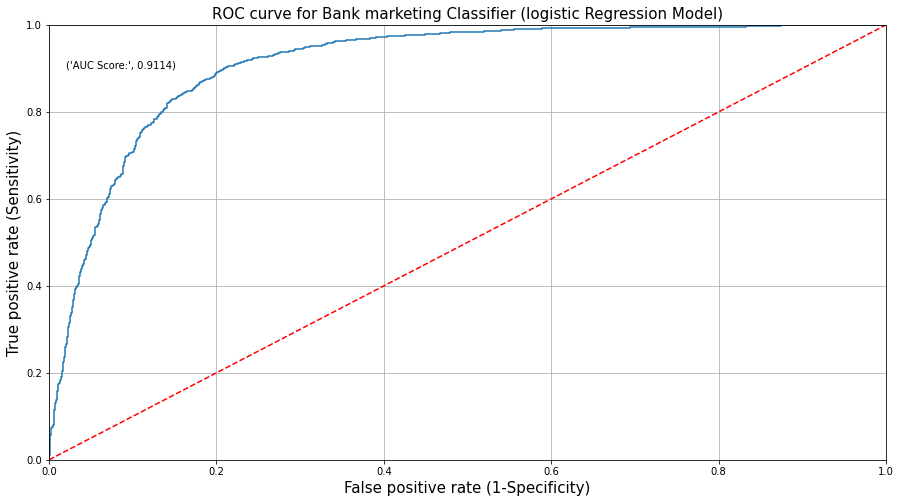

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Bank marketing Classifier (logistic Regression Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
plt.grid(True)

In [ ]:
update_score_card("Simple Logistic Regression",logreg,cutoff=0.69,stability="Good")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Logistic Regression,0.690000,Good,0.398345,0.911383,0.883061,0.635127,0.783219,0.561842,0.738849


# Guassian naive bayes model

In [ ]:
def update_score_card(Model_name,model,cutoff="-",stability="Stable"):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    y_pred=model.predict(X_test)
    global score_card
    score_card = score_card.append({"Model Name":Model_name,
                                    "Prob.Cutoff":cutoff,
                                    'Stability': stability,
                                    "r2_score":metrics.r2_score(y_test, y_pred),
                                    'AUC' : metrics.roc_auc_score(y_test, y_pred_prob),
                                    'Precision': metrics.precision_score(y_test, y_pred),
                                    'Recall': metrics.recall_score(y_test, y_pred),
                                    'Accuracy': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return score_card

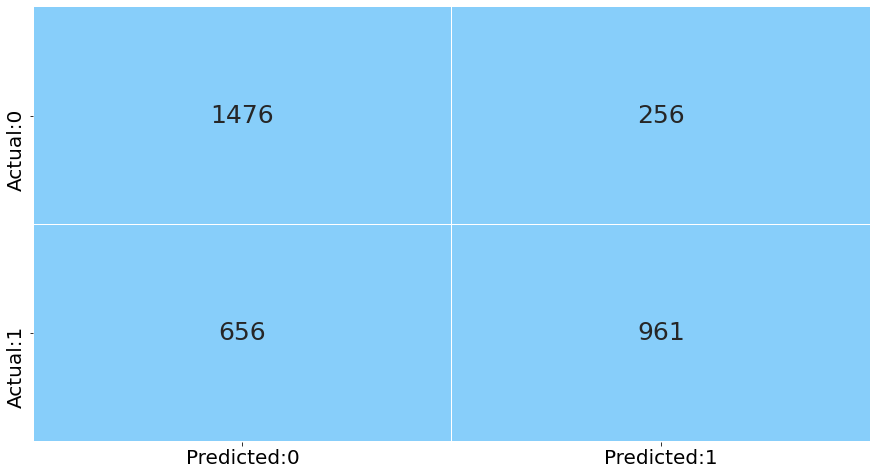

In [ ]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
plot_confusion_matrix(gnb_model)

In [ ]:
test_report = get_test_report(gnb_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.69      0.85      0.76      1732
           1       0.79      0.59      0.68      1617

    accuracy                           0.73      3349
   macro avg       0.74      0.72      0.72      3349
weighted avg       0.74      0.73      0.72      3349



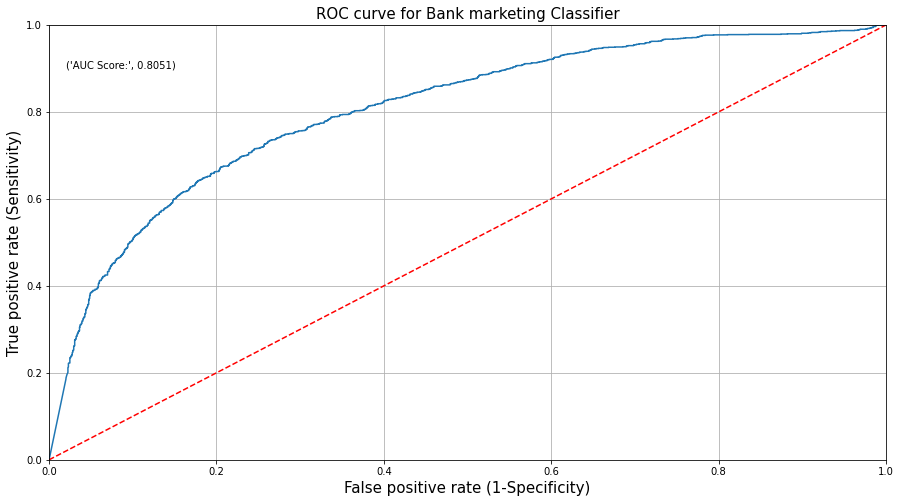

In [ ]:
plot_roc(gnb_model)

In [ ]:
update_score_card("gNB Classifier",gnb_model,stability="Stable")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Logistic Regression,0.690000,Good,0.398345,0.911383,0.883061,0.635127,0.783219,0.561842,0.738849
1,gNB Classifier,-,Stable,-0.090566,0.805127,0.789647,0.594310,0.727680,0.450202,0.678193


# KNN model

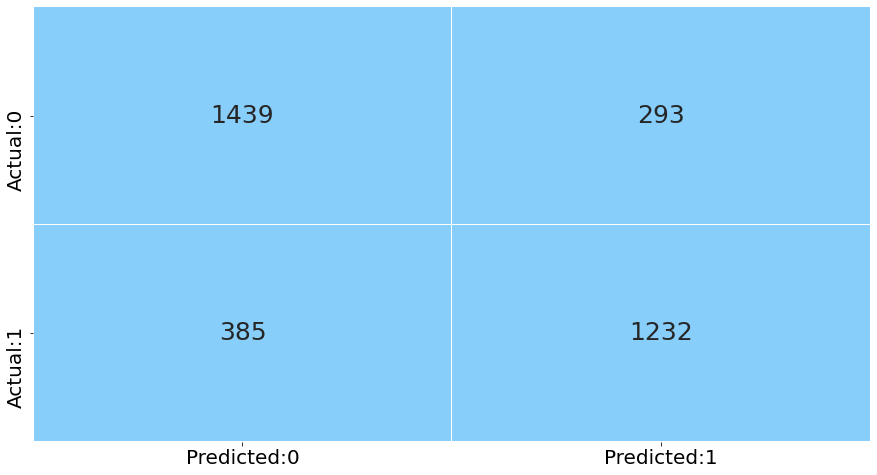

In [ ]:
knn_classification = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn_classification.fit(X_train, y_train)
plot_confusion_matrix(knn_model)

In [ ]:
test_report = get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1732
           1       0.81      0.76      0.78      1617

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



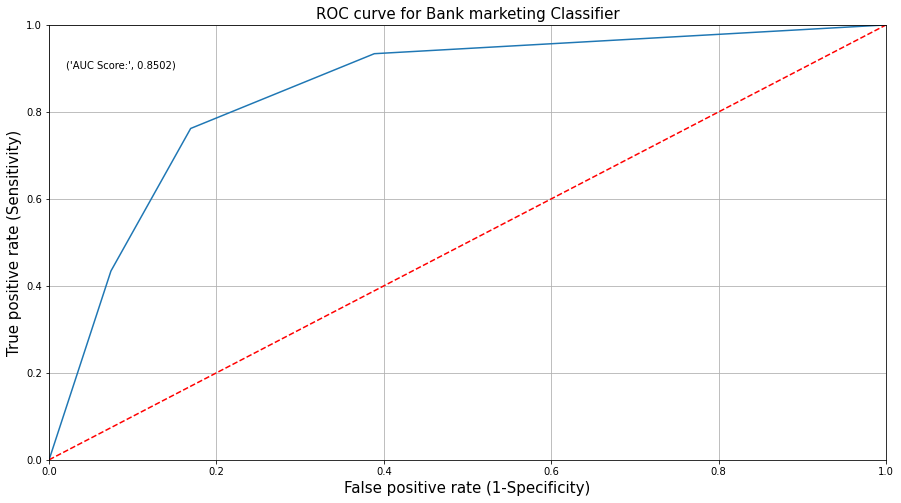

In [ ]:
plot_roc(knn_model)

In [ ]:
update_score_card("KNN Classifier",knn_model,stability="Stable")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Logistic Regression,0.690000,Good,0.398345,0.911383,0.883061,0.635127,0.783219,0.561842,0.738849
1,gNB Classifier,-,Stable,-0.090566,0.805127,0.789647,0.594310,0.727680,0.450202,0.678193
2,KNN Classifier,-,Stable,0.189250,0.850236,0.807869,0.761905,0.797552,0.593858,0.784214


# DECISION TREE

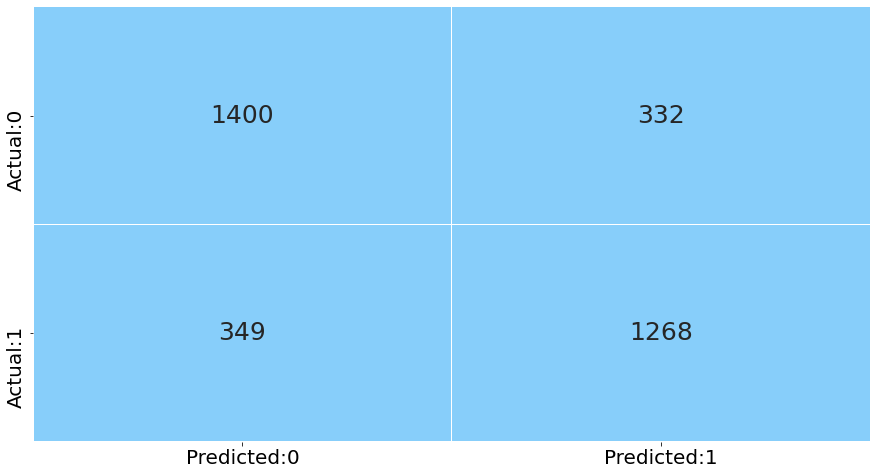

In [ ]:
decision_tree_classification =DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(X_train, y_train)
plot_confusion_matrix(decision_tree)

In [ ]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1732
           1       0.79      0.78      0.79      1617

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



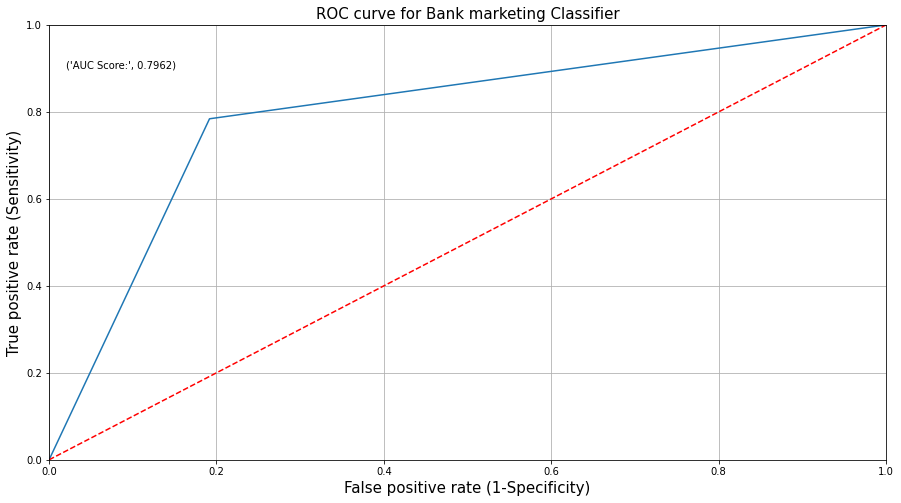

In [ ]:
plot_roc(decision_tree)

In [ ]:
update_score_card("Decision Tree Classifier",decision_tree,stability="Stable")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Logistic Regression,0.690000,Good,0.398345,0.911383,0.883061,0.635127,0.783219,0.561842,0.738849
1,gNB Classifier,-,Stable,-0.090566,0.805127,0.789647,0.594310,0.727680,0.450202,0.678193
2,KNN Classifier,-,Stable,0.189250,0.850236,0.807869,0.761905,0.797552,0.593858,0.784214
3,Decision Tree Classifier,-,Stable,0.185663,0.796241,0.792500,0.784168,0.796656,0.592689,0.788312


# RANDOM FOREST

In [ ]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

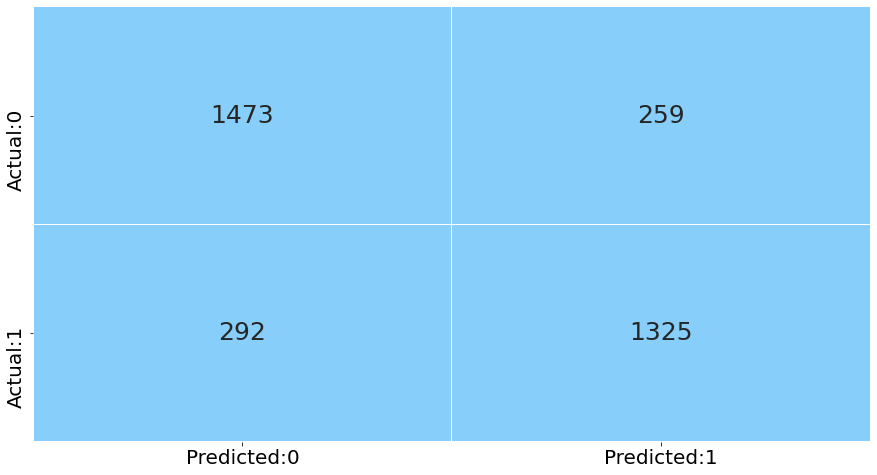

In [ ]:
plot_confusion_matrix(rf_model)

In [ ]:
test_report = get_test_report(rf_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1732
           1       0.84      0.82      0.83      1617

    accuracy                           0.84      3349
   macro avg       0.84      0.83      0.84      3349
weighted avg       0.84      0.84      0.84      3349



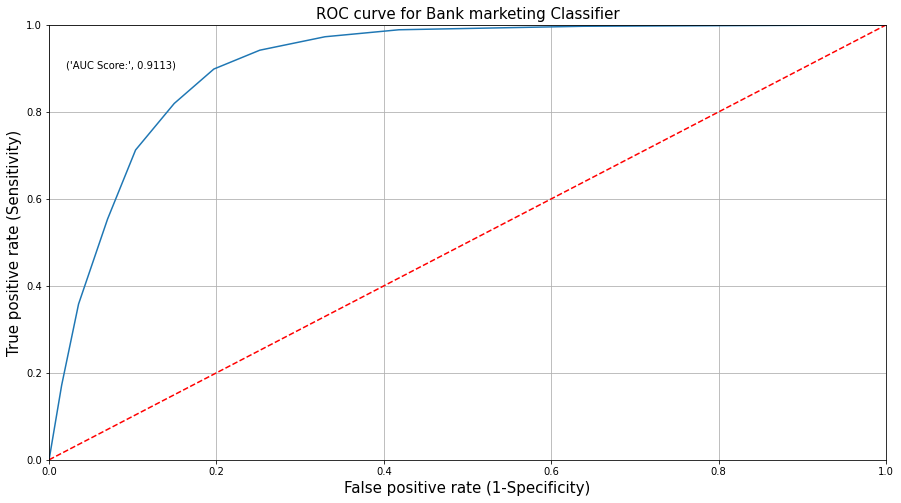

In [ ]:
plot_roc(rf_classification)

In [ ]:
update_score_card("Random Forest Classifier",rf_model,stability="Good")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Logistic Regression,0.690000,Good,0.398345,0.911383,0.883061,0.635127,0.783219,0.561842,0.738849
1,gNB Classifier,-,Stable,-0.090566,0.805127,0.789647,0.594310,0.727680,0.450202,0.678193
2,KNN Classifier,-,Stable,0.189250,0.850236,0.807869,0.761905,0.797552,0.593858,0.784214
3,Decision Tree Classifier,-,Stable,0.185663,0.796241,0.792500,0.784168,0.796656,0.592689,0.788312
4,Random Forest Classifier,-,Good,0.341116,0.911264,0.836490,0.819419,0.835473,0.670335,0.827866


# ADABoost (구분이 어려운 값에 가중치)

In [ ]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10) # 나무의 갯수 40
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=40, random_state=10)

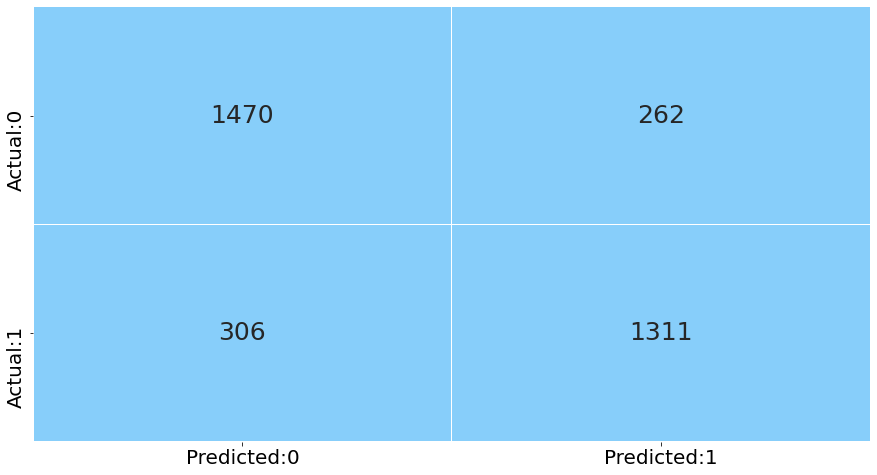

In [ ]:
plot_confusion_matrix(ada_model)

In [ ]:
test_report = get_test_report(ada_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1732
           1       0.83      0.81      0.82      1617

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



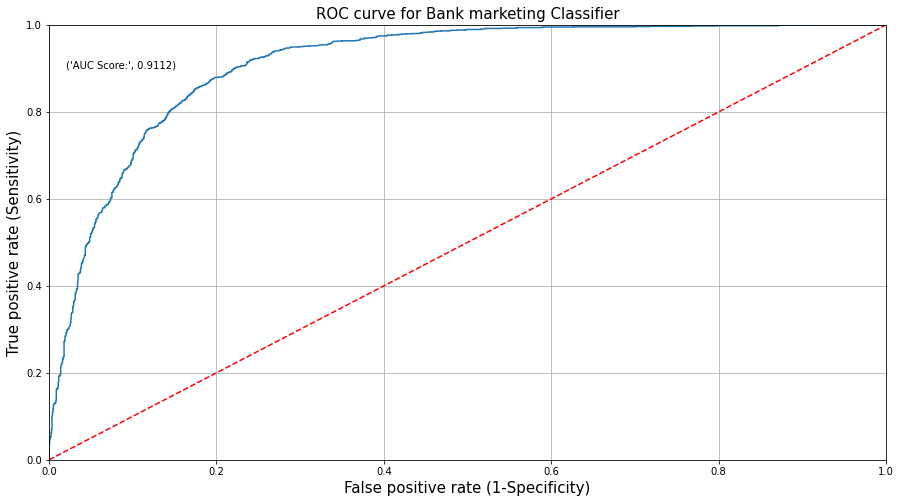

In [ ]:
plot_roc(ada_model)

In [ ]:
update_score_card("ADAboost classifier",ada_model,stability="Good")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Logistic Regression,0.690000,Good,0.398345,0.911383,0.883061,0.635127,0.783219,0.561842,0.738849
1,gNB Classifier,-,Stable,-0.090566,0.805127,0.789647,0.594310,0.727680,0.450202,0.678193
2,KNN Classifier,-,Stable,0.189250,0.850236,0.807869,0.761905,0.797552,0.593858,0.784214
3,Decision Tree Classifier,-,Stable,0.185663,0.796241,0.792500,0.784168,0.796656,0.592689,0.788312
4,Random Forest Classifier,-,Good,0.341116,0.911264,0.836490,0.819419,0.835473,0.670335,0.827866
5,ADAboost classifier,-,Good,0.320788,0.911217,0.833439,0.810761,0.830397,0.660087,0.821944


# Gradient Boost (비용함수를 이용하여 잔차 구분)

In [ ]:
gboost_model = GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=10, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

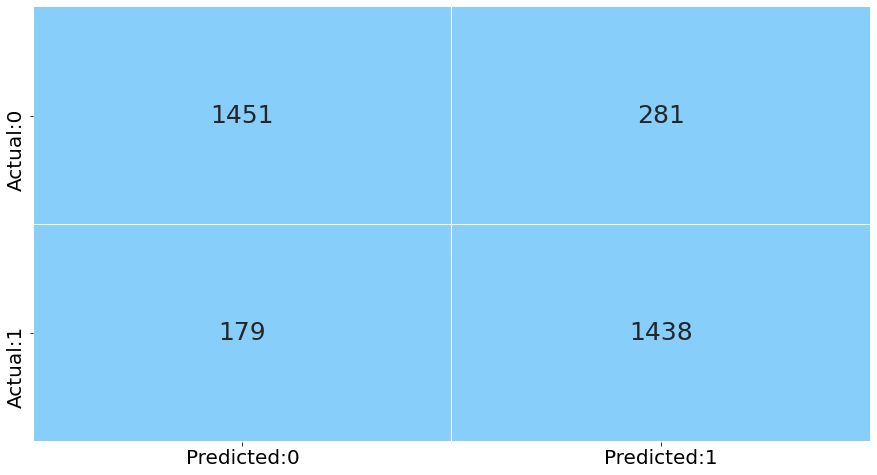

In [ ]:
plot_confusion_matrix(gboost_model)

In [ ]:
test_report = get_test_report(gboost_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1732
           1       0.84      0.89      0.86      1617

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



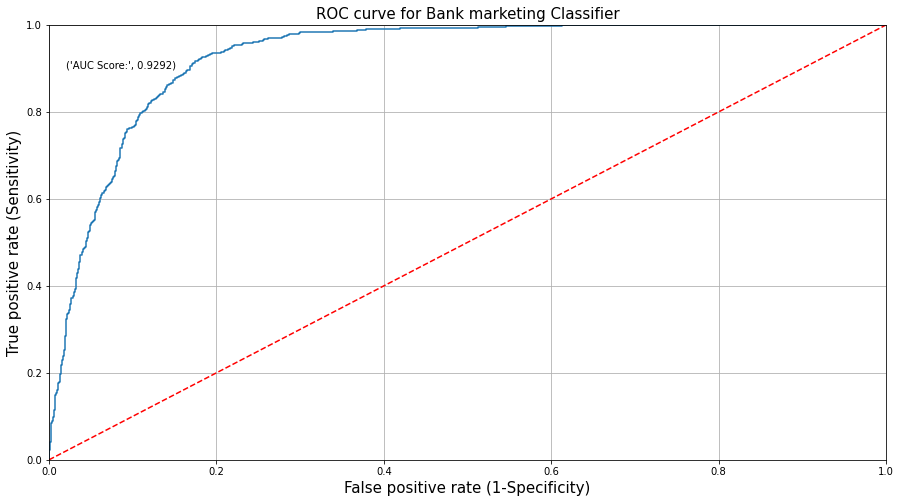

In [ ]:
plot_roc(gboost_model)

In [ ]:
update_score_card("Gradient boost classifier",gboost_model,stability="Good")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Logistic Regression,0.690000,Good,0.398345,0.911383,0.883061,0.635127,0.783219,0.561842,0.738849
1,gNB Classifier,-,Stable,-0.090566,0.805127,0.789647,0.594310,0.727680,0.450202,0.678193
2,KNN Classifier,-,Stable,0.189250,0.850236,0.807869,0.761905,0.797552,0.593858,0.784214
3,Decision Tree Classifier,-,Stable,0.185663,0.796241,0.792500,0.784168,0.796656,0.592689,0.788312
4,Random Forest Classifier,-,Good,0.341116,0.911264,0.836490,0.819419,0.835473,0.670335,0.827866
5,ADAboost classifier,-,Good,0.320788,0.911217,0.833439,0.810761,0.830397,0.660087,0.821944
6,Gradient boost classifier,-,Good,0.449934,0.929188,0.836533,0.889301,0.862646,0.725542,0.862110


# XG Boost (level-wise)

In [ ]:
xgb_model = XGBClassifier(max_depth = 10, gamma = 1)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

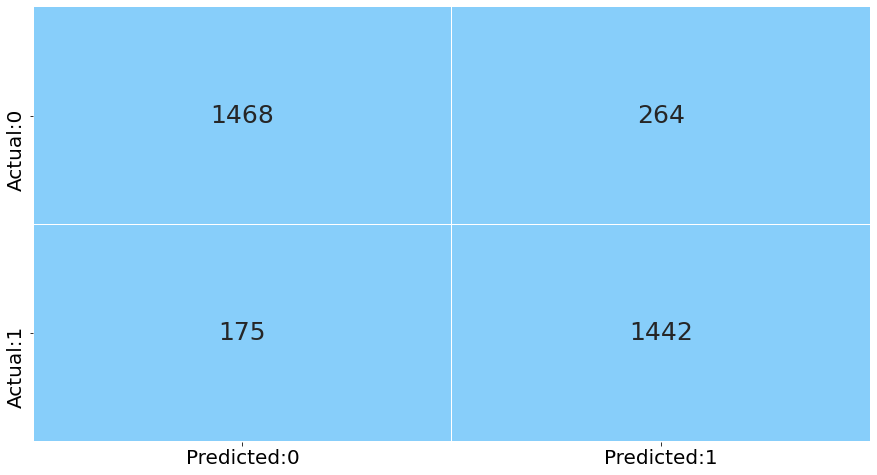

In [ ]:
plot_confusion_matrix(xgb_model)

In [ ]:
test_report = get_test_report(xgb_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1732
           1       0.85      0.89      0.87      1617

    accuracy                           0.87      3349
   macro avg       0.87      0.87      0.87      3349
weighted avg       0.87      0.87      0.87      3349



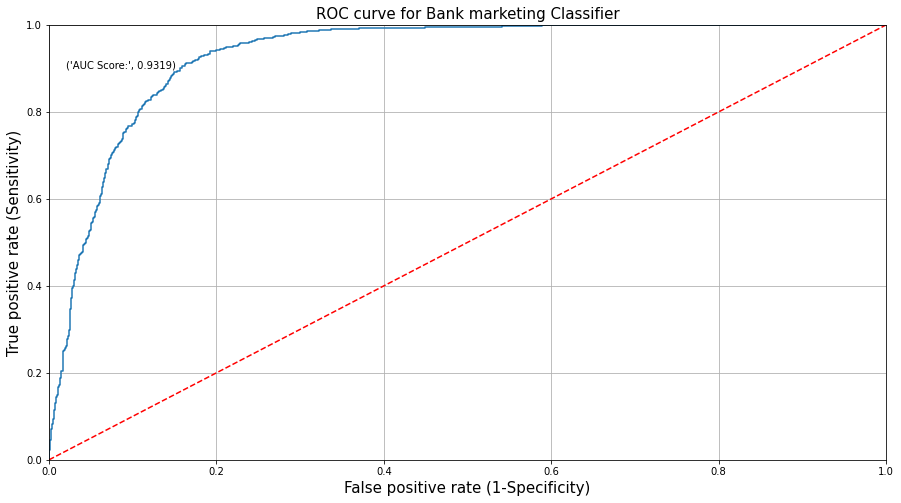

In [ ]:
plot_roc(xgb_model)

In [ ]:
update_score_card("XGBClassifier",xgb_model,stability="Good")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Logistic Regression,0.690000,Good,0.398345,0.911383,0.883061,0.635127,0.783219,0.561842,0.738849
1,gNB Classifier,-,Stable,-0.090566,0.805127,0.789647,0.594310,0.727680,0.450202,0.678193
2,KNN Classifier,-,Stable,0.189250,0.850236,0.807869,0.761905,0.797552,0.593858,0.784214
3,Decision Tree Classifier,-,Stable,0.185663,0.796241,0.792500,0.784168,0.796656,0.592689,0.788312
4,Random Forest Classifier,-,Good,0.341116,0.911264,0.836490,0.819419,0.835473,0.670335,0.827866
5,ADAboost classifier,-,Good,0.320788,0.911217,0.833439,0.810761,0.830397,0.660087,0.821944
6,Gradient boost classifier,-,Good,0.449934,0.929188,0.836533,0.889301,0.862646,0.725542,0.862110
7,XGBClassifier,-,Good,0.475045,0.931925,0.845252,0.891775,0.868916,0.738001,0.867890


# LightGBM (leaf-wise)

[10]	training's rmse: 0.360265	valid_0's rmse: 0.369625
[20]	training's rmse: 0.321351	valid_0's rmse: 0.339317
[30]	training's rmse: 0.305531	valid_0's rmse: 0.332181
[40]	training's rmse: 0.294736	valid_0's rmse: 0.329959
[50]	training's rmse: 0.288038	valid_0's rmse: 0.328695
[60]	training's rmse: 0.281209	valid_0's rmse: 0.328032
[70]	training's rmse: 0.27561	valid_0's rmse: 0.327237
[80]	training's rmse: 0.269797	valid_0's rmse: 0.325965
[90]	training's rmse: 0.263992	valid_0's rmse: 0.325779
[100]	training's rmse: 0.258569	valid_0's rmse: 0.325534


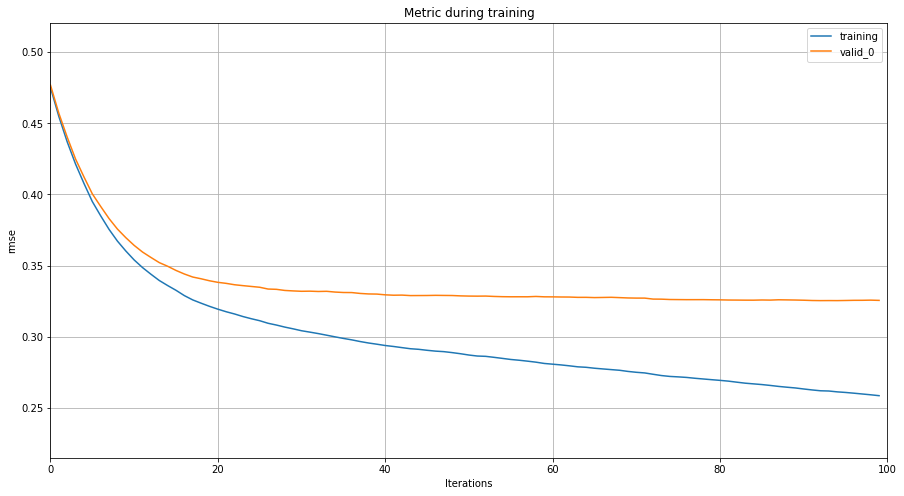

In [ ]:
import lightgbm as lgb
import sklearn.datasets, sklearn.model_selection


X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, random_state=7054)

model = lgb.LGBMClassifier(max_depth = 10, gamma = 1, objective='rmse', seed=8798)
model.fit(X_train2, y_train2, eval_set=[(X_val2, y_val2), (X_train2, y_train2)], verbose=10)

lgb.plot_metric(model)

In [ ]:
lgb_model = LGBMClassifier(max_depth = 10, gamma = 1)

In [ ]:
lgb_model = LGBMClassifier(max_depth = 10, gamma = 1)
lgb_model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               gamma=1, importance_type='split', learning_rate=0.1,
               max_depth=10, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [ ]:
X_train.shape

(7813, 51)

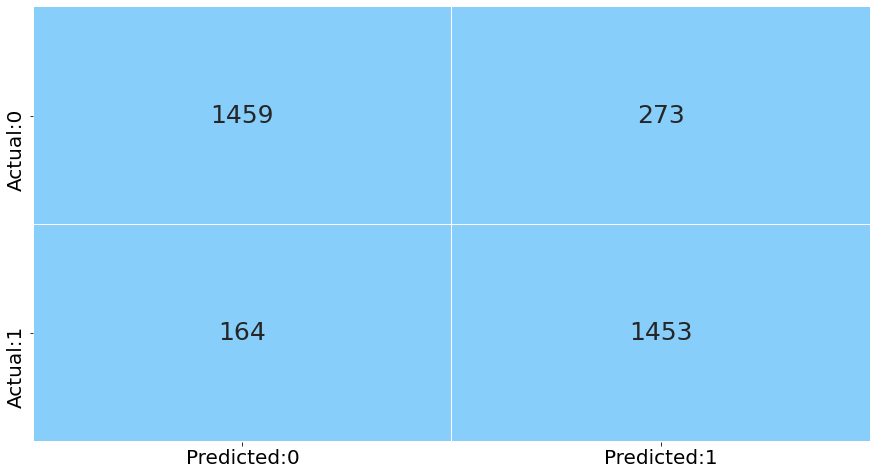

In [ ]:
plot_confusion_matrix(lgb_model)

In [ ]:
y_pred = lgb_model.predict(X_test)

In [ ]:
y_pred

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
test_report = get_test_report(lgb_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1732
           1       0.84      0.90      0.87      1617

    accuracy                           0.87      3349
   macro avg       0.87      0.87      0.87      3349
weighted avg       0.87      0.87      0.87      3349



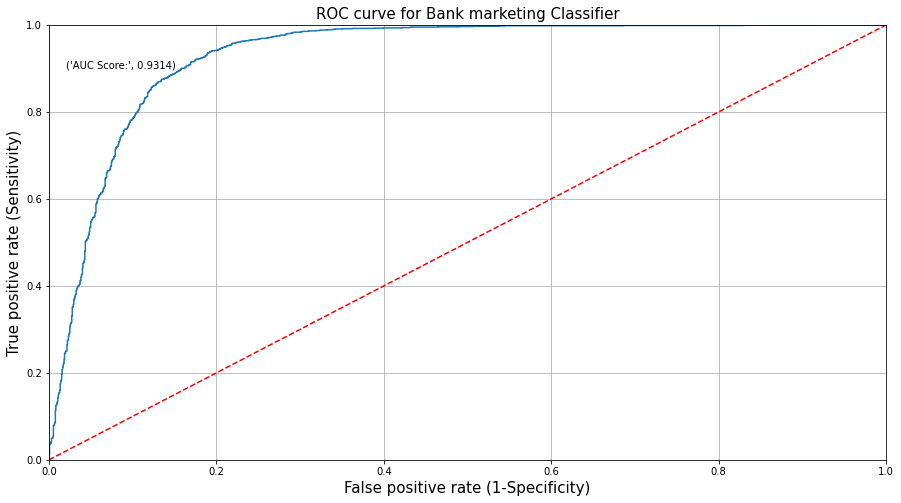

In [ ]:
plot_roc(lgb_model)

In [ ]:
update_score_card("LGBMClassifier",lgb_model,stability="Good")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Logistic Regression,0.690000,Good,0.398345,0.911383,0.883061,0.635127,0.783219,0.561842,0.738849
1,gNB Classifier,-,Stable,-0.090566,0.805127,0.789647,0.594310,0.727680,0.450202,0.678193
2,KNN Classifier,-,Stable,0.189250,0.850236,0.807869,0.761905,0.797552,0.593858,0.784214
3,Decision Tree Classifier,-,Stable,0.185663,0.796241,0.792500,0.784168,0.796656,0.592689,0.788312
4,Random Forest Classifier,-,Good,0.341116,0.911264,0.836490,0.819419,0.835473,0.670335,0.827866
5,ADAboost classifier,-,Good,0.320788,0.911217,0.833439,0.810761,0.830397,0.660087,0.821944
6,Gradient boost classifier,-,Good,0.449934,0.929188,0.836533,0.889301,0.862646,0.725542,0.862110
7,XGBClassifier,-,Good,0.475045,0.931925,0.845252,0.891775,0.868916,0.738001,0.867890
8,LGBMClassifier,-,Good,0.477437,0.931351,0.841831,0.898578,0.869513,0.739302,0.869279


# Catboost(범주형 데이터 포함의 경우)

In [ ]:
cat_model = CatBoostClassifier(max_depth = 10)
cat_model.fit(X_train, y_train)

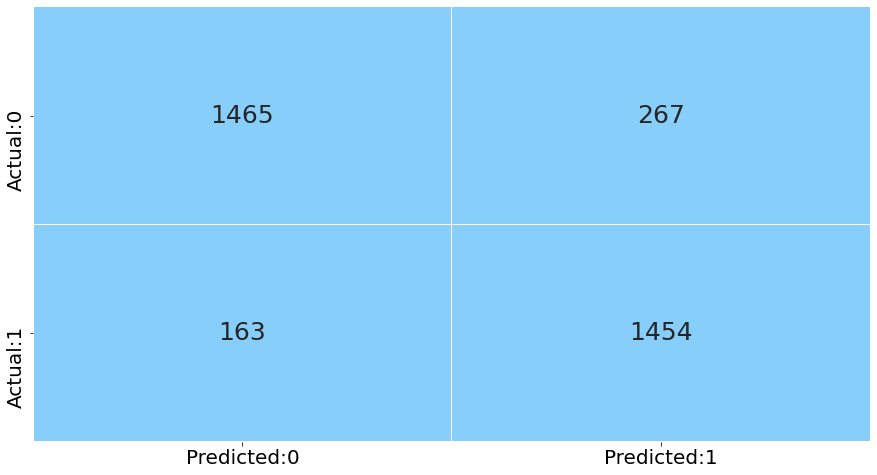

In [ ]:
plot_confusion_matrix(cat_model)

In [ ]:
test_report = get_test_report(cat_model)
print(test_report) 

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1732
           1       0.84      0.90      0.87      1617

    accuracy                           0.87      3349
   macro avg       0.87      0.87      0.87      3349
weighted avg       0.87      0.87      0.87      3349



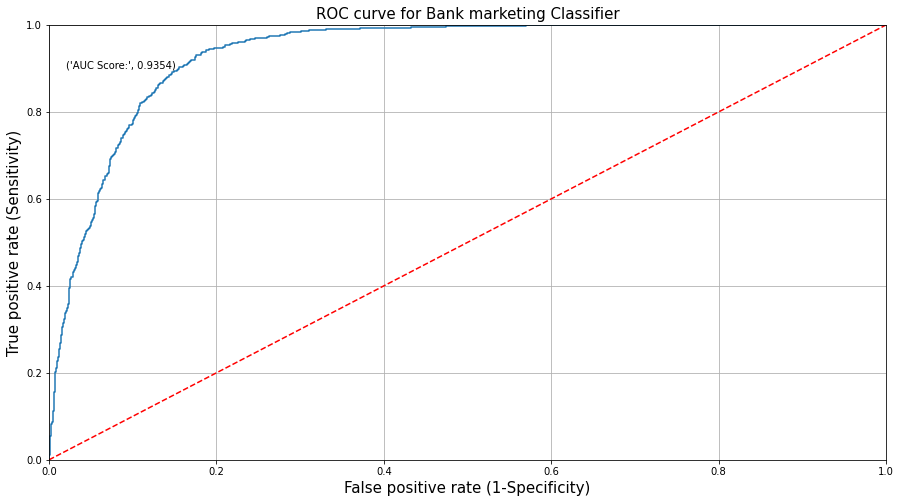

In [ ]:
plot_roc(cat_model)

In [ ]:
update_score_card("CatBoostClassifier",cat_model,stability="Best")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Logistic Regression,0.690000,Good,0.398345,0.911383,0.883061,0.635127,0.783219,0.561842,0.738849
1,gNB Classifier,-,Stable,-0.090566,0.805127,0.789647,0.594310,0.727680,0.450202,0.678193
2,KNN Classifier,-,Stable,0.189250,0.850236,0.807869,0.761905,0.797552,0.593858,0.784214
3,Decision Tree Classifier,-,Stable,0.185663,0.796241,0.792500,0.784168,0.796656,0.592689,0.788312
4,Random Forest Classifier,-,Good,0.341116,0.911264,0.836490,0.819419,0.835473,0.670335,0.827866
5,ADAboost classifier,-,Good,0.320788,0.911217,0.833439,0.810761,0.830397,0.660087,0.821944
6,Gradient boost classifier,-,Good,0.449934,0.929188,0.836533,0.889301,0.862646,0.725542,0.862110
7,XGBClassifier,-,Good,0.475045,0.931925,0.845252,0.891775,0.868916,0.738001,0.867890
8,LGBMClassifier,-,Good,0.477437,0.931351,0.841831,0.898578,0.869513,0.739302,0.869279
9,CatBoostClassifier,-,Best,0.485808,0.935437,0.844858,0.899196,0.871603,0.743452,0.871180


# Stacking Classifier

In [ ]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', GaussianNB()),
                 ('ada_model', AdaBoostClassifier(n_estimators = 40, random_state = 10)),
                 ('gboost_model', GradientBoostingClassifier(n_estimators = 150, max_depth = 10, random_state = 10)),
                 ('xgb_model',XGBClassifier(max_depth = 10, gamma = 1)),
                 ('lgb_model',LGBMClassifier(max_depth = 10, gamma = 1)),
                 ('cat_model',CatBoostClassifier(max_depth = 10))]
stack_model = StackingClassifier(estimators = base_learners, final_estimator = CatBoostClassifier())
stack_model.fit(X_train, y_train)


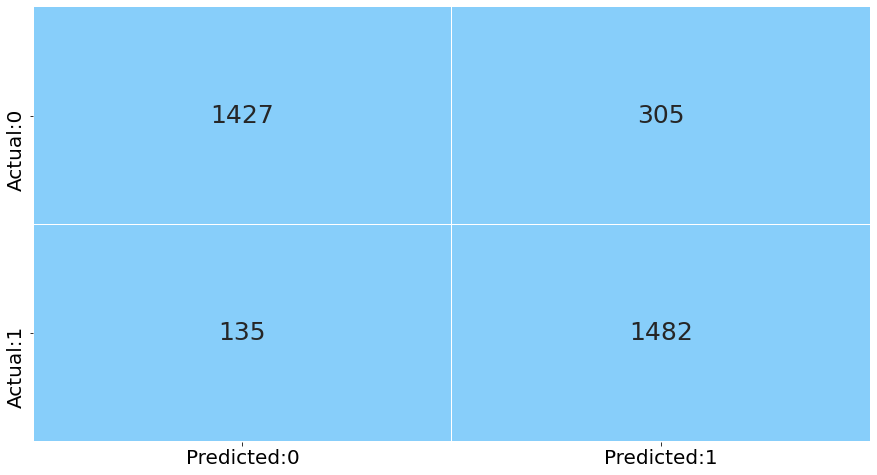

In [ ]:
plot_confusion_matrix(stack_model)

In [ ]:
test_report = get_test_report(stack_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.91      0.82      0.87      1732
           1       0.83      0.92      0.87      1617

    accuracy                           0.87      3349
   macro avg       0.87      0.87      0.87      3349
weighted avg       0.87      0.87      0.87      3349



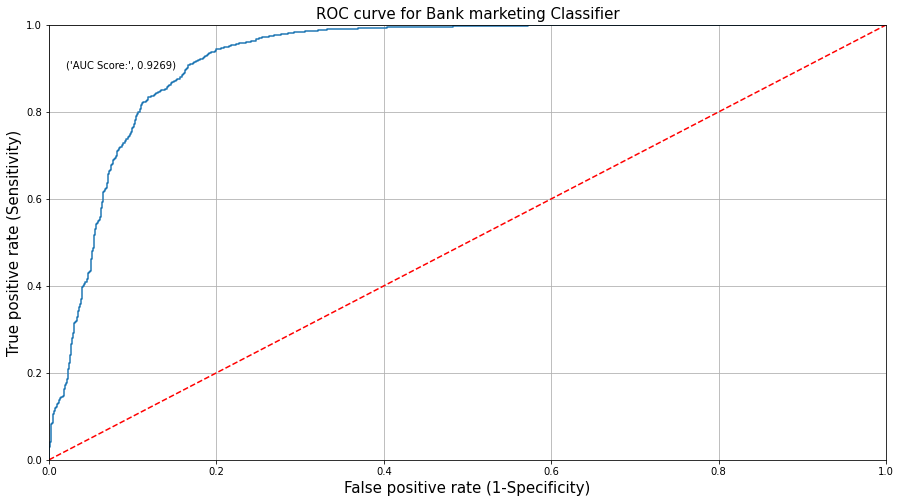

In [ ]:
plot_roc(stack_model)

In [ ]:
update_score_card("Stacking classifier",stack_model,stability="Good")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Logistic Regression,0.690000,Good,0.398345,0.911383,0.883061,0.635127,0.783219,0.561842,0.738849
1,gNB Classifier,-,Stable,-0.090566,0.805127,0.789647,0.594310,0.727680,0.450202,0.678193
2,KNN Classifier,-,Stable,0.189250,0.850236,0.807869,0.761905,0.797552,0.593858,0.784214
3,Decision Tree Classifier,-,Stable,0.185663,0.796241,0.792500,0.784168,0.796656,0.592689,0.788312
4,Random Forest Classifier,-,Good,0.341116,0.911264,0.836490,0.819419,0.835473,0.670335,0.827866
5,ADAboost classifier,-,Good,0.320788,0.911217,0.833439,0.810761,0.830397,0.660087,0.821944
6,Gradient boost classifier,-,Good,0.449934,0.929188,0.836533,0.889301,0.862646,0.725542,0.862110
7,XGBClassifier,-,Good,0.475045,0.931925,0.845252,0.891775,0.868916,0.738001,0.867890
8,LGBMClassifier,-,Good,0.477437,0.931351,0.841831,0.898578,0.869513,0.739302,0.869279
9,CatBoostClassifier,-,Best,0.485808,0.935437,0.844858,0.899196,0.871603,0.743452,0.871180


# KNN model Tuned (using GridSearch)

In [ ]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 19} 



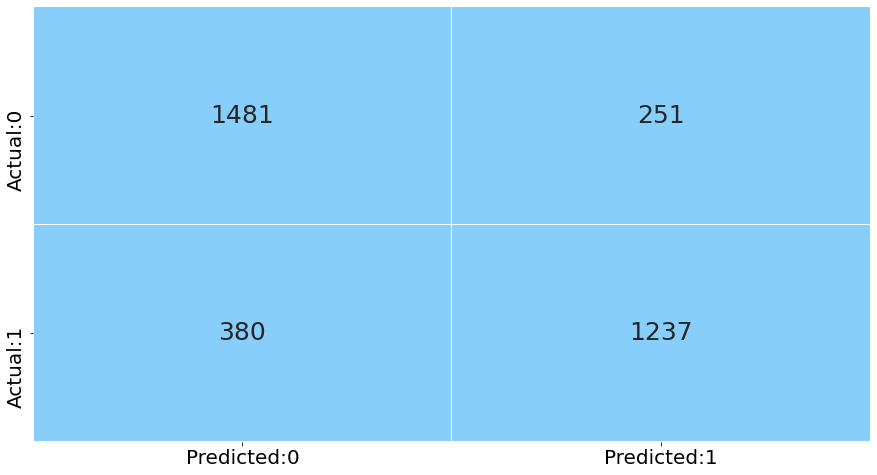

In [ ]:
knn_classification = KNeighborsClassifier(metric='euclidean',n_neighbors=19)
knn_model_tuned = knn_classification.fit(X_train, y_train)
plot_confusion_matrix(knn_model_tuned)

In [ ]:
print(get_test_report(knn_model_tuned))

              precision    recall  f1-score   support

           0       0.80      0.86      0.82      1732
           1       0.83      0.76      0.80      1617

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



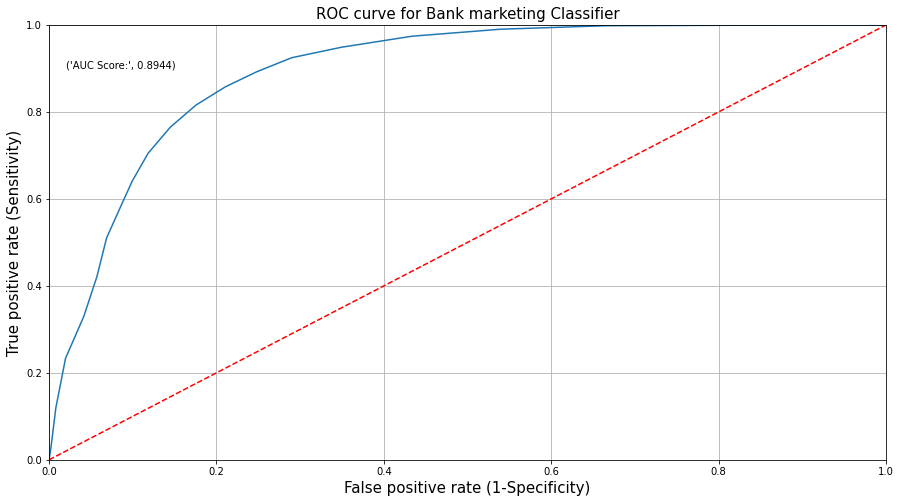

In [ ]:
plot_roc(knn_model_tuned)

# 인공신경망(y를 원핫인코딩)

In [58]:
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical, plot_model

In [85]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('deposit')
    labels = to_categorical(labels)
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe)) #shuffle( )은 입력된 buffer_size만큼 data를 채우고 무작위로 sampling하여 새로운 data로 바꿈
    ds = ds.batch(batch_size)
    return ds

In [87]:
# 변수 정의
feature_columns1 = []

# 모델링 시 입력되는 수치형 열 추출
for header in x.columns:
    feature_columns1.append(feature_column.numeric_column(header))

In [88]:
feature_layer1 = tf.keras.layers.DenseFeatures(feature_columns1)

In [96]:
train3, test3 = train_test_split(total, test_size=0.3)
train3, val3 = train_test_split(train3, test_size=0.2)

In [98]:
train_ds3 = df_to_dataset(train3, batch_size=32)
val_ds3 = df_to_dataset(val3, shuffle=False, batch_size=32)
test_ds3 = df_to_dataset(test3, shuffle=False, batch_size=32)

In [ ]:
model = tf.keras.Sequential([
  feature_layer1,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(2, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds3,
                    validation_data=val_ds3,
                    epochs=50)

In [100]:
loss, accuracy = model.evaluate(test_ds3)
print("정확도", accuracy)

105/105 [==============================] - 0s 4ms/step - loss: 0.9606 - accuracy: 0.8220
정확도 0.8220364451408386


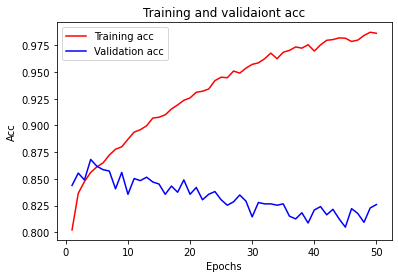

In [101]:
history_dict = history.history
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, 51)

plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validaiont acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

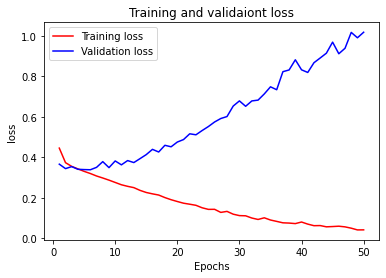

In [102]:
history_dict = history.history
%matplotlib inline
acc = history.history['loss']
val_acc = history.history['val_loss']

epochs = range(1, 51)

plt.plot(epochs, acc, 'r', label = 'Training loss')
plt.plot(epochs, val_acc, 'b', label = 'Validation loss')
plt.title('Training and validaiont loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [103]:
predict = model.predict(test_ds3)

Consider rewriting this model with the Functional API.


In [105]:
predict

array([[1.8174410e-02, 9.8050541e-01],
       [7.5751543e-04, 9.9928391e-01],
       [1.2544006e-02, 9.8842347e-01],
       ...,
       [9.9998784e-01, 1.0687865e-05],
       [9.9768090e-01, 2.5509000e-03],
       [9.9807060e-01, 2.2920966e-03]], dtype=float32)

In [107]:
yhat_classes = model.predict_classes(test_ds3, verbose=0) #이진으로 분류해줌

In [108]:
yhat_classes

array([1, 1, 1, ..., 0, 0, 0])

In [111]:
accuracy = accuracy_score(test3['deposit'], yhat_classes)
print(accuracy)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(test3['deposit'], yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test3['deposit'], yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test3['deposit'], yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(test3['deposit'], yhat_classes)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(test3['deposit'], yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test3['deposit'], yhat_classes)
print(matrix)

0.8220364287847118
Accuracy: 0.822036
Precision: 0.813806
Recall: 0.809704
F1 score: 0.811750
Cohens kappa: 0.643009
ROC AUC: 0.821424
[[1468  294]
 [ 302 1285]]


# 인공신경망(y를 1개로 취급)

In [ ]:
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers

In [ ]:
# tf 모델을 돌리기 위해 판다스 데이터프레임의 열을 모델 훈련에 필요한 피쳐로 매핑
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('deposit')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    return ds

In [ ]:
# 피쳐 열을 만들고 배치 데이터를 변환하는 함수
def demo(feature_column):
    feature_layer = layers.DenseFeatures(feature_column)
    print(feature_layer(example_batch).numpy())

In [ ]:
# 변수 정의
feature_columns = []

# 수치형 열을 인공신경망 돌리기 위해 변환
for header in x.columns:
    feature_columns.append(feature_column.numeric_column(header))

In [ ]:
# 피쳐 열을 정의하고 나면 DenseFeatures 레이어를 사용해 케라스 모델에 주입
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
# 인공신경망 코드를 위해 데이터 다시 분할
train, test = train_test_split(total, test_size=0.3)
train, val = train_test_split(train, test_size=0.2)

In [ ]:
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [ ]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history = model.fit(train_ds,
          validation_data=val_ds,
          epochs=50)

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("정확도", accuracy)

53/53 [==============================] - 0s 6ms/step - loss: 0.1410 - accuracy: 0.8298
정확도 0.8297999501228333


In [ ]:
#print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


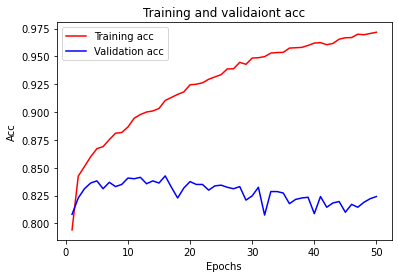

In [ ]:
history_dict = history.history
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, 51)

plt.plot(epochs, acc, 'r', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validaiont acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

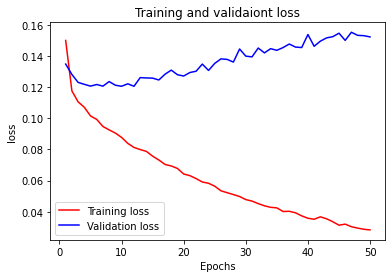

In [ ]:
history_dict = history.history
%matplotlib inline
acc = history.history['loss']
val_acc = history.history['val_loss']

epochs = range(1, 51)

plt.plot(epochs, acc, 'r', label = 'Training loss')
plt.plot(epochs, val_acc, 'b', label = 'Validation loss')
plt.title('Training and validaiont loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
predict = model.predict(test_ds)

Consider rewriting this model with the Functional API.


In [ ]:
yhat_classes = model.predict_classes(test_ds, verbose=0) #이진으로 분류해줌

In [ ]:
# reduce to 1d array
yhat_probs = predict[:, 0]
yhat_classes = yhat_classes[:, 0]

In [ ]:
yhat_classes

array([0, 1, 1, ..., 0, 1, 1], dtype=int32)

In [109]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
accuracy = accuracy_score(test['deposit'], yhat_classes)
print(accuracy)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(test['deposit'], yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(test['deposit'], yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test['deposit'], yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(test['deposit'], yhat_classes)
print('Cohens kappa: %f' % kappa)

# ROC AUC
auc = roc_auc_score(test['deposit'], yhat_classes)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(test['deposit'], yhat_classes)
print(matrix)

0.8312929232606748
Accuracy: 0.831293
Precision: 0.818017
Recall: 0.836735
F1 score: 0.827270
Cohens kappa: 0.662444
ROC AUC: 0.831474
[[1431  301]
 [ 264 1353]]


# AUC

No handles with labels found to put in legend.


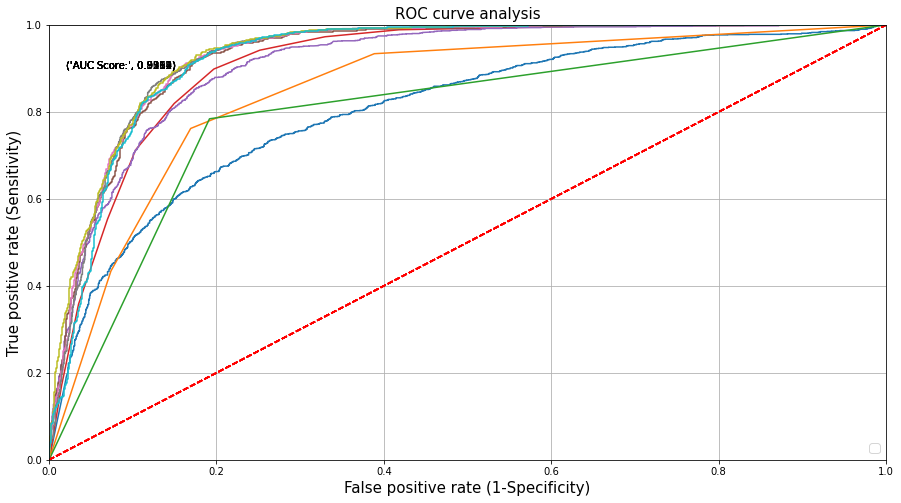

In [ ]:
plot_roc(gnb_model)
plot_roc(knn_model)
plot_roc(decision_tree)
plot_roc(rf_classification)
plot_roc(ada_model)
plot_roc(gboost_model)
plot_roc(xgb_model)
plot_roc(lgb_model)
plot_roc(cat_model)
plot_roc(stack_model)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])


plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve analysis', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

plt.legend(prop={'size':13}, loc='lower right')
plt.grid(True)

# 변수 중요도

In [ ]:
def show_feature_importance(model, data):
    df=pd.DataFrame({'column':list(data.columns),
              'score':list(model.feature_importances_),
             })
    plt.figure(figsize=(20,10))
    sns.barplot(x="score", y="column", data=df)
    plt.yticks(size=20)
    plt.xticks(size=20)
    plt.xlabel('score', size=20)
    plt.ylabel('column', size=20)
    plt.show()

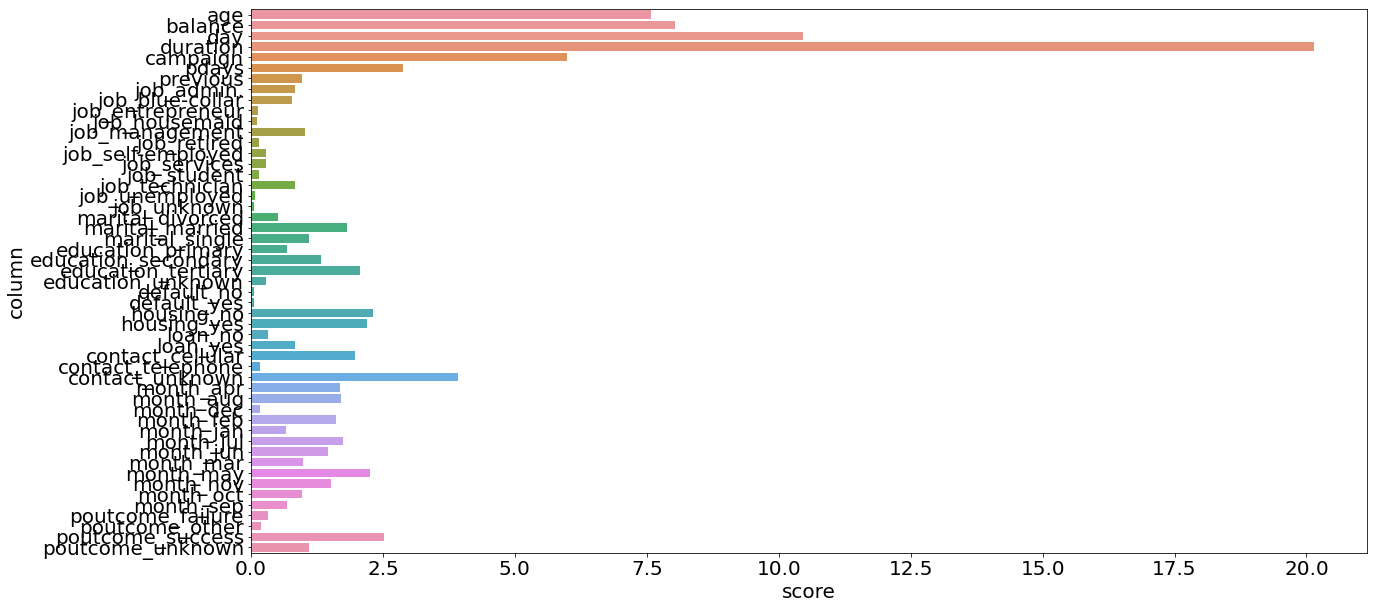

In [ ]:
# 가장 잘 나온 catboost model feature_importance
show_feature_importance(cat_model, X_train)

In [ ]:
from sklearn.feature_selection import RFE
#  RFE (recursive feature elimination)는 Backward 방식중 하나로, 모든 변수를 우선 다 포함시킨 후 
#  반복해서 학습을 진행하면서 중요도가 낮은 변수를 하나씩 제거하는 방식

In [ ]:
fs_model = CatBoostClassifier(max_depth = 10)
rfe = RFE(fs_model, 15)
fit = rfe.fit(X_train, y_train)

In [ ]:
print("Num Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: " ,fit.ranking_)

Num Features:  15
Selected Features:  [ True  True  True  True  True  True False False False False False False
 False False False False False False False False  True False False False
  True False False False  True  True False False False False  True False
  True False False False  True False False  True False False False False
 False  True False]
Feature Ranking:  [ 1  1  1  1  1  1  6 14  9 33 32  8 29 25 23 31 13 35 36 20  1 11 21  3
  1 26 34 37  1  1 22 10  4 27  1  7  1 30  5 18  1 12 17  1  2 15 19 24
 28  1 16]


In [ ]:
X_train.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

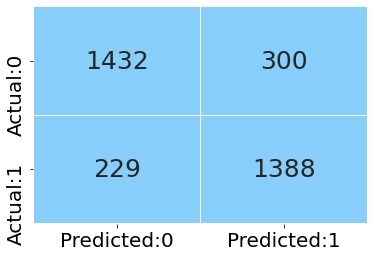

In [ ]:
plot_confusion_matrix(fit)

In [ ]:
test_report = get_test_report(fit)
print(test_report)

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1732
           1       0.82      0.86      0.84      1617

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



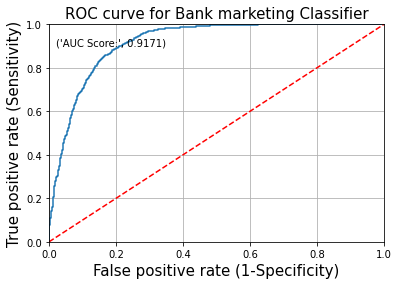

In [ ]:
plot_roc(fit)

In [ ]:
update_score_card("Feature Selection",fit,stability="Good")

,Model Name,Prob.Cutoff,Stability,r2_score,AUC,Precision,Recall,Accuracy,Kappa,f1-score
0,Simple Logistic Regression,0.690000,Good,0.398345,0.911383,0.883061,0.635127,0.783219,0.561842,0.738849
1,gNB Classifier,-,Stable,-0.090566,0.805127,0.789647,0.594310,0.727680,0.450202,0.678193
2,KNN Classifier,-,Stable,0.189250,0.850236,0.807869,0.761905,0.797552,0.593858,0.784214
3,Decision Tree Classifier,-,Stable,0.185663,0.796241,0.792500,0.784168,0.796656,0.592689,0.788312
4,Random Forest Classifier,-,Good,0.341116,0.911264,0.836490,0.819419,0.835473,0.670335,0.827866
5,ADAboost classifier,-,Good,0.320788,0.911217,0.833439,0.810761,0.830397,0.660087,0.821944
6,Gradient boost classifier,-,Good,0.449934,0.929188,0.836533,0.889301,0.862646,0.725542,0.862110
7,XGBClassifier,-,Good,0.475045,0.931925,0.845252,0.891775,0.868916,0.738001,0.867890
8,LGBMClassifier,-,Good,0.477437,0.931351,0.841831,0.898578,0.869513,0.739302,0.869279
9,CatBoostClassifier,-,Best,0.485808,0.935437,0.844858,0.899196,0.871603,0.743452,0.871180


# 10-folod cross validation 예제 코드

In [45]:
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMRegressor

In [46]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) #셔플 트루로 해야 폴드별로 데이터 중복 안됨

folds=[]
for train_idx, valid_idx in skf.split(X_train, y_train):
    folds.append((train_idx, valid_idx))
    

In [47]:
# 폴드 하나의 MSE가 높게 나오면 포함해서 앙상블해도 되고 빼고 앙상블해보고 둘 다 해봐
models={}
for fold in range(10):
    lgb_model = LGBMClassifier(max_depth = 10, gamma = 1)
    
    # 데이터 분리 설정
    train_idx = folds[fold][0]
    valid_idx = folds[fold][1]
    X_t, y_t = X_train.iloc[train_idx], y_train.iloc[train_idx]
    X_v, y_v = X_train.iloc[valid_idx], y_train.iloc[valid_idx]

    
    lgb_model.fit(X_t, y_t, eval_set=[(X_t, y_t), (X_v, y_v)], 
                   eval_metric='rmse', verbose=200, #200번 마다 출력 
                  early_stopping_rounds=200)
    
    # 모델 저장
    models[fold] = lgb_model


Training until validation scores don't improve for 200 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.221502	training's rmse: 0.253197	valid_1's binary_logloss: 0.321509	valid_1's rmse: 0.307448
Training until validation scores don't improve for 200 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.213579	training's rmse: 0.247167	valid_1's binary_logloss: 0.386462	valid_1's rmse: 0.347235
Training until validation scores don't improve for 200 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.219321	training's rmse: 0.251609	valid_1's binary_logloss: 0.345722	valid_1's rmse: 0.32806
Training until validation scores don't improve for 200 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.217657	training's rmse: 0.250146	valid_1's binary_logloss: 0.352251	valid_1's rmse: 0.332629
Training until validation scores don't improv

In [48]:
y_pred = models[0].predict(X_test)

In [49]:
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [50]:
preds=0
for fold in range(10): 
  preds += models[fold].predict(X_test)/10

In [51]:
preds

array([1. , 0. , 0. , ..., 1. , 0. , 0.6])

In [ ]:
pred = []
for i in preds:
  if i >= 0.5:
    i = 1
    pred.append(i)
  else:
    i = 0
    pred.append(i)

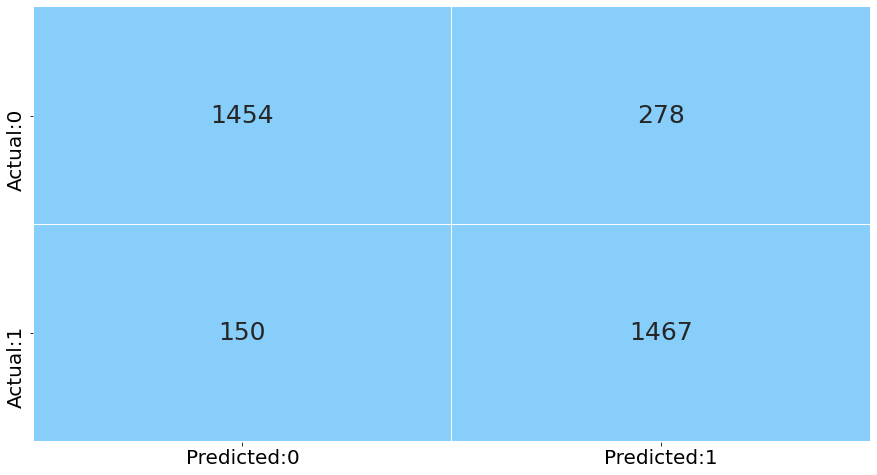

In [ ]:
cm = confusion_matrix(y_test, pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.91      0.84      0.87      1732\n           1       0.84      0.91      0.87      1617\n\n    accuracy                           0.87      3349\n   macro avg       0.87      0.87      0.87      3349\nweighted avg       0.87      0.87      0.87      3349\n'

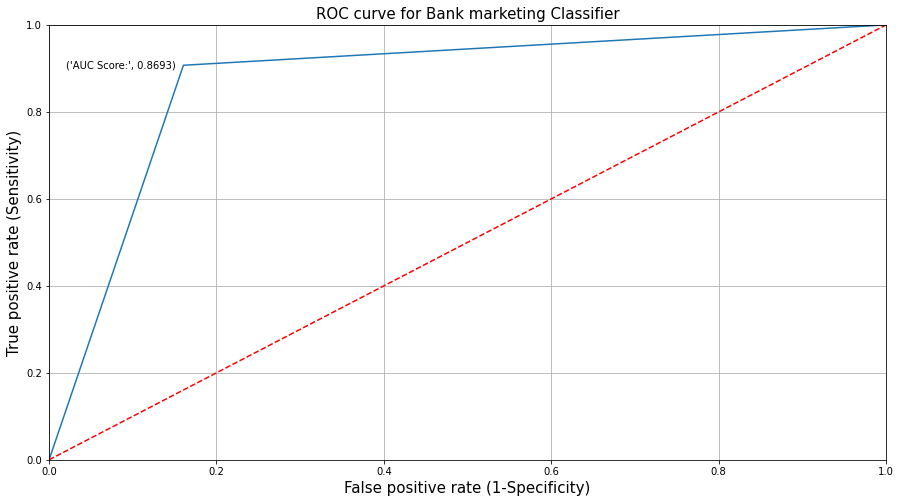

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Bank marketing Classifier', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, test1),4)))
plt.grid(True)

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
degree = np.arange(1, 21)

In [ ]:
train_score, val_score = validation_curve(
   LGBMClassifier(),X_train, y_train, "max_depth",
   degree, cv=10, scoring="r2")

# # Fit and show the visualizer
# viz.fit(X_train, y_train)
# viz.show()

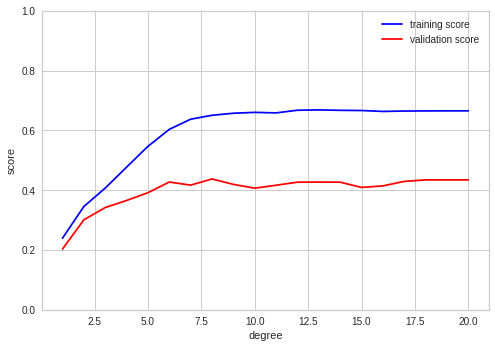

In [ ]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');